# Number Representation and Precision

Real numbers are stored with a decimal precision (or mantissa) and the decimal exponent range. The mantissa contains the significant figures of the number (and thereby the precision of the number). A number like (9.90625)10 in the decimal representation is given in a binary representation by

(1001.11101)$_2$ = $1\times2^3 +0\times2^2 +0\times2^1 +1\times2^0 +1\times2^{−1} +1\times2^{−2} +1\times2^{−3} +0\times2^{−4} +1 \times 2^{−5}$

and it has an exact machine number representation since we need a finite number of bits to represent this number. This representation is however not very practical. Rather, we prefer to use a scientific notation. In the decimal system we would write a number like 9.90625 in what is called the normalized scientific notation. This means simply that the decimal point is shifted and appropriate powers of 10 are supplied. Our number could then be written as
$9.90625 = 0.990625 \times 10^1$,
and a real non-zero number could be generalized as
$x = \pm r \times 10^n$,
with a $r$ a number in the range $1/10 \le r < 1$. In a similar way we can represent a binary number in
scientific notation as
$x = \pm q \times 2^m$,
with a $q$ a number in the range $1/2 \le q < 1$.

In a typical computer, floating-point numbers are represented in the way described above, but with certain restrictions on q and m imposed by the available word length. In the machine, our number x is represented as

$x = (−1)^s \times mantissa \times 2^{exponent}$

where $s$ is the sign bit, and the exponent gives the available range. With a single-precision word, 32 bits, 8 bits would typically be reserved for the exponent, 1 bit for the sign and 23 for the mantissa. 

## 32-bit – single precision:

Sign bit: 1 bit

Exponent: 8 bits

Significand precision: 24 bits (23 explicitly stored)

This gives 6–9 significant decimal digits precision!

## 64-bit = double precision:

Sign bit: 1 bit

Exponent: 11 bits

Significand precision: 53 bits (52 explicitly stored)

This gives 15–17 significant decimal digits precision.
This the the Python default standard


## 128-bit = quadruple precision:

Sign bit: 1 bit

Exponent: 15 bits

Significand precision: 113 bits (112 explicitly stored)

This gives 33–36 significant decimal digits precision.


## 256-bit – Octuple precision:

Sign bit: 1 bit
    
Exponent: 19 bits
    
Significand precision: 237 bits (236 explicitly stored)

THIS IS RARELY IMPLEMENTED


# Precision effects

One important consequence of rounding error is that you should **NEVER Use an if statment to test equality of two floats.**  For instance, you should nerev, in any program, have a statment like:

In [13]:
x = 3.30000009
if x == 3.3:
    print(x)

If you need to do a logic trigger based on a float:

In [14]:
epsilon = 1e-12
if abs(x-3.3) < epsilon:
    print(x)

## Which operations are most important in dealing with precision?

__Subtraction__ and __Derivatives__

## Subtraction

a = b - c

We have:   $fl(a) = fl(b) - fl(c) = a(1+\epsilon_a)$  or
            $fl(a) = b(1+\epsilon_b) - c(1+\epsilon_c)$
            
So, $fl(a)/a = 1 + \epsilon_b (b/a) - \epsilon_c (c/a)$

IF $b \sim c$, we have the potential of increased error on $fl(a)$


If we have:

$x = 1000000000000000$

$y = 1000000000000001.2345678901234$

as far the computer is concerned:
    

In [15]:
x = 1000000000000000
y = 1000000000000001.2345678901234
 
print(y-x) 

1.25


**The true result should be 1.2345678901234!**

In other words, instead of 16-figure accuracy we now only have three figures and the fractional error is a few percent of the true value.  This is much worse than before!


To see another exanple of this in practice, consider two numbers:

$x = 1$, and $ y = 1+10^{-14}\sqrt 2$ 

Simply we can see that:

$ 10^{14} (y - x) = \sqrt 2$

Let us try the same calculation in python:
 

In [19]:
from math import sqrt
x = 1.0
y = 1.0 + (1e-14)*sqrt(2)

print((1e14)*(y-x))
print(sqrt(2))

1.4210854715202004
1.4142135623730951


Again error off by a percent.  We need to be careful in how we code math!

## Example 1:  Summing $1/n$ 

Consider the series:

$$s_1 = \sum_{n=1}^N \frac{1}{n}$$ which is finite when N is finite, then consider

$$s_2 = \sum_{n=N}^1 \frac{1}{n}$$ which when summed analyitically should give $s_2 = s_1$

In [18]:
N = 1e8
s1 = 0
s2 = 0
n = 1
while n <= N:
    s1 += 1/n
    s2 += 1/(N-n+1)
    n += 1
    if n % 1000 == 0:
        print(n)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

1293000
1294000
1295000
1296000
1297000
1298000
1299000
1300000
1301000
1302000
1303000
1304000
1305000
1306000
1307000
1308000
1309000
1310000
1311000
1312000
1313000
1314000
1315000
1316000
1317000
1318000
1319000
1320000
1321000
1322000
1323000
1324000
1325000
1326000
1327000
1328000
1329000
1330000
1331000
1332000
1333000
1334000
1335000
1336000
1337000
1338000
1339000
1340000
1341000
1342000
1343000
1344000
1345000
1346000
1347000
1348000
1349000
1350000
1351000
1352000
1353000
1354000
1355000
1356000
1357000
1358000
1359000
1360000
1361000
1362000
1363000
1364000
1365000
1366000
1367000
1368000
1369000
1370000
1371000
1372000
1373000
1374000
1375000
1376000
1377000
1378000
1379000
1380000
1381000
1382000
1383000
1384000
1385000
1386000
1387000
1388000
1389000
1390000
1391000
1392000
1393000
1394000
1395000
1396000
1397000
1398000
1399000
1400000
1401000
1402000
1403000
1404000
1405000
1406000
1407000
1408000
1409000
1410000
1411000
1412000
1413000
1414000
1415000
1416000
1417000


2475000
2476000
2477000
2478000
2479000
2480000
2481000
2482000
2483000
2484000
2485000
2486000
2487000
2488000
2489000
2490000
2491000
2492000
2493000
2494000
2495000
2496000
2497000
2498000
2499000
2500000
2501000
2502000
2503000
2504000
2505000
2506000
2507000
2508000
2509000
2510000
2511000
2512000
2513000
2514000
2515000
2516000
2517000
2518000
2519000
2520000
2521000
2522000
2523000
2524000
2525000
2526000
2527000
2528000
2529000
2530000
2531000
2532000
2533000
2534000
2535000
2536000
2537000
2538000
2539000
2540000
2541000
2542000
2543000
2544000
2545000
2546000
2547000
2548000
2549000
2550000
2551000
2552000
2553000
2554000
2555000
2556000
2557000
2558000
2559000
2560000
2561000
2562000
2563000
2564000
2565000
2566000
2567000
2568000
2569000
2570000
2571000
2572000
2573000
2574000
2575000
2576000
2577000
2578000
2579000
2580000
2581000
2582000
2583000
2584000
2585000
2586000
2587000
2588000
2589000
2590000
2591000
2592000
2593000
2594000
2595000
2596000
2597000
2598000
2599000


3593000
3594000
3595000
3596000
3597000
3598000
3599000
3600000
3601000
3602000
3603000
3604000
3605000
3606000
3607000
3608000
3609000
3610000
3611000
3612000
3613000
3614000
3615000
3616000
3617000
3618000
3619000
3620000
3621000
3622000
3623000
3624000
3625000
3626000
3627000
3628000
3629000
3630000
3631000
3632000
3633000
3634000
3635000
3636000
3637000
3638000
3639000
3640000
3641000
3642000
3643000
3644000
3645000
3646000
3647000
3648000
3649000
3650000
3651000
3652000
3653000
3654000
3655000
3656000
3657000
3658000
3659000
3660000
3661000
3662000
3663000
3664000
3665000
3666000
3667000
3668000
3669000
3670000
3671000
3672000
3673000
3674000
3675000
3676000
3677000
3678000
3679000
3680000
3681000
3682000
3683000
3684000
3685000
3686000
3687000
3688000
3689000
3690000
3691000
3692000
3693000
3694000
3695000
3696000
3697000
3698000
3699000
3700000
3701000
3702000
3703000
3704000
3705000
3706000
3707000
3708000
3709000
3710000
3711000
3712000
3713000
3714000
3715000
3716000
3717000


4643000
4644000
4645000
4646000
4647000
4648000
4649000
4650000
4651000
4652000
4653000
4654000
4655000
4656000
4657000
4658000
4659000
4660000
4661000
4662000
4663000
4664000
4665000
4666000
4667000
4668000
4669000
4670000
4671000
4672000
4673000
4674000
4675000
4676000
4677000
4678000
4679000
4680000
4681000
4682000
4683000
4684000
4685000
4686000
4687000
4688000
4689000
4690000
4691000
4692000
4693000
4694000
4695000
4696000
4697000
4698000
4699000
4700000
4701000
4702000
4703000
4704000
4705000
4706000
4707000
4708000
4709000
4710000
4711000
4712000
4713000
4714000
4715000
4716000
4717000
4718000
4719000
4720000
4721000
4722000
4723000
4724000
4725000
4726000
4727000
4728000
4729000
4730000
4731000
4732000
4733000
4734000
4735000
4736000
4737000
4738000
4739000
4740000
4741000
4742000
4743000
4744000
4745000
4746000
4747000
4748000
4749000
4750000
4751000
4752000
4753000
4754000
4755000
4756000
4757000
4758000
4759000
4760000
4761000
4762000
4763000
4764000
4765000
4766000
4767000


5669000
5670000
5671000
5672000
5673000
5674000
5675000
5676000
5677000
5678000
5679000
5680000
5681000
5682000
5683000
5684000
5685000
5686000
5687000
5688000
5689000
5690000
5691000
5692000
5693000
5694000
5695000
5696000
5697000
5698000
5699000
5700000
5701000
5702000
5703000
5704000
5705000
5706000
5707000
5708000
5709000
5710000
5711000
5712000
5713000
5714000
5715000
5716000
5717000
5718000
5719000
5720000
5721000
5722000
5723000
5724000
5725000
5726000
5727000
5728000
5729000
5730000
5731000
5732000
5733000
5734000
5735000
5736000
5737000
5738000
5739000
5740000
5741000
5742000
5743000
5744000
5745000
5746000
5747000
5748000
5749000
5750000
5751000
5752000
5753000
5754000
5755000
5756000
5757000
5758000
5759000
5760000
5761000
5762000
5763000
5764000
5765000
5766000
5767000
5768000
5769000
5770000
5771000
5772000
5773000
5774000
5775000
5776000
5777000
5778000
5779000
5780000
5781000
5782000
5783000
5784000
5785000
5786000
5787000
5788000
5789000
5790000
5791000
5792000
5793000


6695000
6696000
6697000
6698000
6699000
6700000
6701000
6702000
6703000
6704000
6705000
6706000
6707000
6708000
6709000
6710000
6711000
6712000
6713000
6714000
6715000
6716000
6717000
6718000
6719000
6720000
6721000
6722000
6723000
6724000
6725000
6726000
6727000
6728000
6729000
6730000
6731000
6732000
6733000
6734000
6735000
6736000
6737000
6738000
6739000
6740000
6741000
6742000
6743000
6744000
6745000
6746000
6747000
6748000
6749000
6750000
6751000
6752000
6753000
6754000
6755000
6756000
6757000
6758000
6759000
6760000
6761000
6762000
6763000
6764000
6765000
6766000
6767000
6768000
6769000
6770000
6771000
6772000
6773000
6774000
6775000
6776000
6777000
6778000
6779000
6780000
6781000
6782000
6783000
6784000
6785000
6786000
6787000
6788000
6789000
6790000
6791000
6792000
6793000
6794000
6795000
6796000
6797000
6798000
6799000
6800000
6801000
6802000
6803000
6804000
6805000
6806000
6807000
6808000
6809000
6810000
6811000
6812000
6813000
6814000
6815000
6816000
6817000
6818000
6819000


7746000
7747000
7748000
7749000
7750000
7751000
7752000
7753000
7754000
7755000
7756000
7757000
7758000
7759000
7760000
7761000
7762000
7763000
7764000
7765000
7766000
7767000
7768000
7769000
7770000
7771000
7772000
7773000
7774000
7775000
7776000
7777000
7778000
7779000
7780000
7781000
7782000
7783000
7784000
7785000
7786000
7787000
7788000
7789000
7790000
7791000
7792000
7793000
7794000
7795000
7796000
7797000
7798000
7799000
7800000
7801000
7802000
7803000
7804000
7805000
7806000
7807000
7808000
7809000
7810000
7811000
7812000
7813000
7814000
7815000
7816000
7817000
7818000
7819000
7820000
7821000
7822000
7823000
7824000
7825000
7826000
7827000
7828000
7829000
7830000
7831000
7832000
7833000
7834000
7835000
7836000
7837000
7838000
7839000
7840000
7841000
7842000
7843000
7844000
7845000
7846000
7847000
7848000
7849000
7850000
7851000
7852000
7853000
7854000
7855000
7856000
7857000
7858000
7859000
7860000
7861000
7862000
7863000
7864000
7865000
7866000
7867000
7868000
7869000
7870000


8796000
8797000
8798000
8799000
8800000
8801000
8802000
8803000
8804000
8805000
8806000
8807000
8808000
8809000
8810000
8811000
8812000
8813000
8814000
8815000
8816000
8817000
8818000
8819000
8820000
8821000
8822000
8823000
8824000
8825000
8826000
8827000
8828000
8829000
8830000
8831000
8832000
8833000
8834000
8835000
8836000
8837000
8838000
8839000
8840000
8841000
8842000
8843000
8844000
8845000
8846000
8847000
8848000
8849000
8850000
8851000
8852000
8853000
8854000
8855000
8856000
8857000
8858000
8859000
8860000
8861000
8862000
8863000
8864000
8865000
8866000
8867000
8868000
8869000
8870000
8871000
8872000
8873000
8874000
8875000
8876000
8877000
8878000
8879000
8880000
8881000
8882000
8883000
8884000
8885000
8886000
8887000
8888000
8889000
8890000
8891000
8892000
8893000
8894000
8895000
8896000
8897000
8898000
8899000
8900000
8901000
8902000
8903000
8904000
8905000
8906000
8907000
8908000
8909000
8910000
8911000
8912000
8913000
8914000
8915000
8916000
8917000
8918000
8919000
8920000


9837000
9838000
9839000
9840000
9841000
9842000
9843000
9844000
9845000
9846000
9847000
9848000
9849000
9850000
9851000
9852000
9853000
9854000
9855000
9856000
9857000
9858000
9859000
9860000
9861000
9862000
9863000
9864000
9865000
9866000
9867000
9868000
9869000
9870000
9871000
9872000
9873000
9874000
9875000
9876000
9877000
9878000
9879000
9880000
9881000
9882000
9883000
9884000
9885000
9886000
9887000
9888000
9889000
9890000
9891000
9892000
9893000
9894000
9895000
9896000
9897000
9898000
9899000
9900000
9901000
9902000
9903000
9904000
9905000
9906000
9907000
9908000
9909000
9910000
9911000
9912000
9913000
9914000
9915000
9916000
9917000
9918000
9919000
9920000
9921000
9922000
9923000
9924000
9925000
9926000
9927000
9928000
9929000
9930000
9931000
9932000
9933000
9934000
9935000
9936000
9937000
9938000
9939000
9940000
9941000
9942000
9943000
9944000
9945000
9946000
9947000
9948000
9949000
9950000
9951000
9952000
9953000
9954000
9955000
9956000
9957000
9958000
9959000
9960000
9961000


10986000
10987000
10988000
10989000
10990000
10991000
10992000
10993000
10994000
10995000
10996000
10997000
10998000
10999000
11000000
11001000
11002000
11003000
11004000
11005000
11006000
11007000
11008000
11009000
11010000
11011000
11012000
11013000
11014000
11015000
11016000
11017000
11018000
11019000
11020000
11021000
11022000
11023000
11024000
11025000
11026000
11027000
11028000
11029000
11030000
11031000
11032000
11033000
11034000
11035000
11036000
11037000
11038000
11039000
11040000
11041000
11042000
11043000
11044000
11045000
11046000
11047000
11048000
11049000
11050000
11051000
11052000
11053000
11054000
11055000
11056000
11057000
11058000
11059000
11060000
11061000
11062000
11063000
11064000
11065000
11066000
11067000
11068000
11069000
11070000
11071000
11072000
11073000
11074000
11075000
11076000
11077000
11078000
11079000
11080000
11081000
11082000
11083000
11084000
11085000
11086000
11087000
11088000
11089000
11090000
11091000
11092000
11093000
11094000
11095000
11096000
1

11979000
11980000
11981000
11982000
11983000
11984000
11985000
11986000
11987000
11988000
11989000
11990000
11991000
11992000
11993000
11994000
11995000
11996000
11997000
11998000
11999000
12000000
12001000
12002000
12003000
12004000
12005000
12006000
12007000
12008000
12009000
12010000
12011000
12012000
12013000
12014000
12015000
12016000
12017000
12018000
12019000
12020000
12021000
12022000
12023000
12024000
12025000
12026000
12027000
12028000
12029000
12030000
12031000
12032000
12033000
12034000
12035000
12036000
12037000
12038000
12039000
12040000
12041000
12042000
12043000
12044000
12045000
12046000
12047000
12048000
12049000
12050000
12051000
12052000
12053000
12054000
12055000
12056000
12057000
12058000
12059000
12060000
12061000
12062000
12063000
12064000
12065000
12066000
12067000
12068000
12069000
12070000
12071000
12072000
12073000
12074000
12075000
12076000
12077000
12078000
12079000
12080000
12081000
12082000
12083000
12084000
12085000
12086000
12087000
12088000
12089000
1

12984000
12985000
12986000
12987000
12988000
12989000
12990000
12991000
12992000
12993000
12994000
12995000
12996000
12997000
12998000
12999000
13000000
13001000
13002000
13003000
13004000
13005000
13006000
13007000
13008000
13009000
13010000
13011000
13012000
13013000
13014000
13015000
13016000
13017000
13018000
13019000
13020000
13021000
13022000
13023000
13024000
13025000
13026000
13027000
13028000
13029000
13030000
13031000
13032000
13033000
13034000
13035000
13036000
13037000
13038000
13039000
13040000
13041000
13042000
13043000
13044000
13045000
13046000
13047000
13048000
13049000
13050000
13051000
13052000
13053000
13054000
13055000
13056000
13057000
13058000
13059000
13060000
13061000
13062000
13063000
13064000
13065000
13066000
13067000
13068000
13069000
13070000
13071000
13072000
13073000
13074000
13075000
13076000
13077000
13078000
13079000
13080000
13081000
13082000
13083000
13084000
13085000
13086000
13087000
13088000
13089000
13090000
13091000
13092000
13093000
13094000
1

14012000
14013000
14014000
14015000
14016000
14017000
14018000
14019000
14020000
14021000
14022000
14023000
14024000
14025000
14026000
14027000
14028000
14029000
14030000
14031000
14032000
14033000
14034000
14035000
14036000
14037000
14038000
14039000
14040000
14041000
14042000
14043000
14044000
14045000
14046000
14047000
14048000
14049000
14050000
14051000
14052000
14053000
14054000
14055000
14056000
14057000
14058000
14059000
14060000
14061000
14062000
14063000
14064000
14065000
14066000
14067000
14068000
14069000
14070000
14071000
14072000
14073000
14074000
14075000
14076000
14077000
14078000
14079000
14080000
14081000
14082000
14083000
14084000
14085000
14086000
14087000
14088000
14089000
14090000
14091000
14092000
14093000
14094000
14095000
14096000
14097000
14098000
14099000
14100000
14101000
14102000
14103000
14104000
14105000
14106000
14107000
14108000
14109000
14110000
14111000
14112000
14113000
14114000
14115000
14116000
14117000
14118000
14119000
14120000
14121000
14122000
1

15045000
15046000
15047000
15048000
15049000
15050000
15051000
15052000
15053000
15054000
15055000
15056000
15057000
15058000
15059000
15060000
15061000
15062000
15063000
15064000
15065000
15066000
15067000
15068000
15069000
15070000
15071000
15072000
15073000
15074000
15075000
15076000
15077000
15078000
15079000
15080000
15081000
15082000
15083000
15084000
15085000
15086000
15087000
15088000
15089000
15090000
15091000
15092000
15093000
15094000
15095000
15096000
15097000
15098000
15099000
15100000
15101000
15102000
15103000
15104000
15105000
15106000
15107000
15108000
15109000
15110000
15111000
15112000
15113000
15114000
15115000
15116000
15117000
15118000
15119000
15120000
15121000
15122000
15123000
15124000
15125000
15126000
15127000
15128000
15129000
15130000
15131000
15132000
15133000
15134000
15135000
15136000
15137000
15138000
15139000
15140000
15141000
15142000
15143000
15144000
15145000
15146000
15147000
15148000
15149000
15150000
15151000
15152000
15153000
15154000
15155000
1

16017000
16018000
16019000
16020000
16021000
16022000
16023000
16024000
16025000
16026000
16027000
16028000
16029000
16030000
16031000
16032000
16033000
16034000
16035000
16036000
16037000
16038000
16039000
16040000
16041000
16042000
16043000
16044000
16045000
16046000
16047000
16048000
16049000
16050000
16051000
16052000
16053000
16054000
16055000
16056000
16057000
16058000
16059000
16060000
16061000
16062000
16063000
16064000
16065000
16066000
16067000
16068000
16069000
16070000
16071000
16072000
16073000
16074000
16075000
16076000
16077000
16078000
16079000
16080000
16081000
16082000
16083000
16084000
16085000
16086000
16087000
16088000
16089000
16090000
16091000
16092000
16093000
16094000
16095000
16096000
16097000
16098000
16099000
16100000
16101000
16102000
16103000
16104000
16105000
16106000
16107000
16108000
16109000
16110000
16111000
16112000
16113000
16114000
16115000
16116000
16117000
16118000
16119000
16120000
16121000
16122000
16123000
16124000
16125000
16126000
16127000
1

17059000
17060000
17061000
17062000
17063000
17064000
17065000
17066000
17067000
17068000
17069000
17070000
17071000
17072000
17073000
17074000
17075000
17076000
17077000
17078000
17079000
17080000
17081000
17082000
17083000
17084000
17085000
17086000
17087000
17088000
17089000
17090000
17091000
17092000
17093000
17094000
17095000
17096000
17097000
17098000
17099000
17100000
17101000
17102000
17103000
17104000
17105000
17106000
17107000
17108000
17109000
17110000
17111000
17112000
17113000
17114000
17115000
17116000
17117000
17118000
17119000
17120000
17121000
17122000
17123000
17124000
17125000
17126000
17127000
17128000
17129000
17130000
17131000
17132000
17133000
17134000
17135000
17136000
17137000
17138000
17139000
17140000
17141000
17142000
17143000
17144000
17145000
17146000
17147000
17148000
17149000
17150000
17151000
17152000
17153000
17154000
17155000
17156000
17157000
17158000
17159000
17160000
17161000
17162000
17163000
17164000
17165000
17166000
17167000
17168000
17169000
1

18024000
18025000
18026000
18027000
18028000
18029000
18030000
18031000
18032000
18033000
18034000
18035000
18036000
18037000
18038000
18039000
18040000
18041000
18042000
18043000
18044000
18045000
18046000
18047000
18048000
18049000
18050000
18051000
18052000
18053000
18054000
18055000
18056000
18057000
18058000
18059000
18060000
18061000
18062000
18063000
18064000
18065000
18066000
18067000
18068000
18069000
18070000
18071000
18072000
18073000
18074000
18075000
18076000
18077000
18078000
18079000
18080000
18081000
18082000
18083000
18084000
18085000
18086000
18087000
18088000
18089000
18090000
18091000
18092000
18093000
18094000
18095000
18096000
18097000
18098000
18099000
18100000
18101000
18102000
18103000
18104000
18105000
18106000
18107000
18108000
18109000
18110000
18111000
18112000
18113000
18114000
18115000
18116000
18117000
18118000
18119000
18120000
18121000
18122000
18123000
18124000
18125000
18126000
18127000
18128000
18129000
18130000
18131000
18132000
18133000
18134000
1

18945000
18946000
18947000
18948000
18949000
18950000
18951000
18952000
18953000
18954000
18955000
18956000
18957000
18958000
18959000
18960000
18961000
18962000
18963000
18964000
18965000
18966000
18967000
18968000
18969000
18970000
18971000
18972000
18973000
18974000
18975000
18976000
18977000
18978000
18979000
18980000
18981000
18982000
18983000
18984000
18985000
18986000
18987000
18988000
18989000
18990000
18991000
18992000
18993000
18994000
18995000
18996000
18997000
18998000
18999000
19000000
19001000
19002000
19003000
19004000
19005000
19006000
19007000
19008000
19009000
19010000
19011000
19012000
19013000
19014000
19015000
19016000
19017000
19018000
19019000
19020000
19021000
19022000
19023000
19024000
19025000
19026000
19027000
19028000
19029000
19030000
19031000
19032000
19033000
19034000
19035000
19036000
19037000
19038000
19039000
19040000
19041000
19042000
19043000
19044000
19045000
19046000
19047000
19048000
19049000
19050000
19051000
19052000
19053000
19054000
19055000
1

19954000
19955000
19956000
19957000
19958000
19959000
19960000
19961000
19962000
19963000
19964000
19965000
19966000
19967000
19968000
19969000
19970000
19971000
19972000
19973000
19974000
19975000
19976000
19977000
19978000
19979000
19980000
19981000
19982000
19983000
19984000
19985000
19986000
19987000
19988000
19989000
19990000
19991000
19992000
19993000
19994000
19995000
19996000
19997000
19998000
19999000
20000000
20001000
20002000
20003000
20004000
20005000
20006000
20007000
20008000
20009000
20010000
20011000
20012000
20013000
20014000
20015000
20016000
20017000
20018000
20019000
20020000
20021000
20022000
20023000
20024000
20025000
20026000
20027000
20028000
20029000
20030000
20031000
20032000
20033000
20034000
20035000
20036000
20037000
20038000
20039000
20040000
20041000
20042000
20043000
20044000
20045000
20046000
20047000
20048000
20049000
20050000
20051000
20052000
20053000
20054000
20055000
20056000
20057000
20058000
20059000
20060000
20061000
20062000
20063000
20064000
2

20934000
20935000
20936000
20937000
20938000
20939000
20940000
20941000
20942000
20943000
20944000
20945000
20946000
20947000
20948000
20949000
20950000
20951000
20952000
20953000
20954000
20955000
20956000
20957000
20958000
20959000
20960000
20961000
20962000
20963000
20964000
20965000
20966000
20967000
20968000
20969000
20970000
20971000
20972000
20973000
20974000
20975000
20976000
20977000
20978000
20979000
20980000
20981000
20982000
20983000
20984000
20985000
20986000
20987000
20988000
20989000
20990000
20991000
20992000
20993000
20994000
20995000
20996000
20997000
20998000
20999000
21000000
21001000
21002000
21003000
21004000
21005000
21006000
21007000
21008000
21009000
21010000
21011000
21012000
21013000
21014000
21015000
21016000
21017000
21018000
21019000
21020000
21021000
21022000
21023000
21024000
21025000
21026000
21027000
21028000
21029000
21030000
21031000
21032000
21033000
21034000
21035000
21036000
21037000
21038000
21039000
21040000
21041000
21042000
21043000
21044000
2

22103000
22104000
22105000
22106000
22107000
22108000
22109000
22110000
22111000
22112000
22113000
22114000
22115000
22116000
22117000
22118000
22119000
22120000
22121000
22122000
22123000
22124000
22125000
22126000
22127000
22128000
22129000
22130000
22131000
22132000
22133000
22134000
22135000
22136000
22137000
22138000
22139000
22140000
22141000
22142000
22143000
22144000
22145000
22146000
22147000
22148000
22149000
22150000
22151000
22152000
22153000
22154000
22155000
22156000
22157000
22158000
22159000
22160000
22161000
22162000
22163000
22164000
22165000
22166000
22167000
22168000
22169000
22170000
22171000
22172000
22173000
22174000
22175000
22176000
22177000
22178000
22179000
22180000
22181000
22182000
22183000
22184000
22185000
22186000
22187000
22188000
22189000
22190000
22191000
22192000
22193000
22194000
22195000
22196000
22197000
22198000
22199000
22200000
22201000
22202000
22203000
22204000
22205000
22206000
22207000
22208000
22209000
22210000
22211000
22212000
22213000
2

23419000
23420000
23421000
23422000
23423000
23424000
23425000
23426000
23427000
23428000
23429000
23430000
23431000
23432000
23433000
23434000
23435000
23436000
23437000
23438000
23439000
23440000
23441000
23442000
23443000
23444000
23445000
23446000
23447000
23448000
23449000
23450000
23451000
23452000
23453000
23454000
23455000
23456000
23457000
23458000
23459000
23460000
23461000
23462000
23463000
23464000
23465000
23466000
23467000
23468000
23469000
23470000
23471000
23472000
23473000
23474000
23475000
23476000
23477000
23478000
23479000
23480000
23481000
23482000
23483000
23484000
23485000
23486000
23487000
23488000
23489000
23490000
23491000
23492000
23493000
23494000
23495000
23496000
23497000
23498000
23499000
23500000
23501000
23502000
23503000
23504000
23505000
23506000
23507000
23508000
23509000
23510000
23511000
23512000
23513000
23514000
23515000
23516000
23517000
23518000
23519000
23520000
23521000
23522000
23523000
23524000
23525000
23526000
23527000
23528000
23529000
2

24382000
24383000
24384000
24385000
24386000
24387000
24388000
24389000
24390000
24391000
24392000
24393000
24394000
24395000
24396000
24397000
24398000
24399000
24400000
24401000
24402000
24403000
24404000
24405000
24406000
24407000
24408000
24409000
24410000
24411000
24412000
24413000
24414000
24415000
24416000
24417000
24418000
24419000
24420000
24421000
24422000
24423000
24424000
24425000
24426000
24427000
24428000
24429000
24430000
24431000
24432000
24433000
24434000
24435000
24436000
24437000
24438000
24439000
24440000
24441000
24442000
24443000
24444000
24445000
24446000
24447000
24448000
24449000
24450000
24451000
24452000
24453000
24454000
24455000
24456000
24457000
24458000
24459000
24460000
24461000
24462000
24463000
24464000
24465000
24466000
24467000
24468000
24469000
24470000
24471000
24472000
24473000
24474000
24475000
24476000
24477000
24478000
24479000
24480000
24481000
24482000
24483000
24484000
24485000
24486000
24487000
24488000
24489000
24490000
24491000
24492000
2

25337000
25338000
25339000
25340000
25341000
25342000
25343000
25344000
25345000
25346000
25347000
25348000
25349000
25350000
25351000
25352000
25353000
25354000
25355000
25356000
25357000
25358000
25359000
25360000
25361000
25362000
25363000
25364000
25365000
25366000
25367000
25368000
25369000
25370000
25371000
25372000
25373000
25374000
25375000
25376000
25377000
25378000
25379000
25380000
25381000
25382000
25383000
25384000
25385000
25386000
25387000
25388000
25389000
25390000
25391000
25392000
25393000
25394000
25395000
25396000
25397000
25398000
25399000
25400000
25401000
25402000
25403000
25404000
25405000
25406000
25407000
25408000
25409000
25410000
25411000
25412000
25413000
25414000
25415000
25416000
25417000
25418000
25419000
25420000
25421000
25422000
25423000
25424000
25425000
25426000
25427000
25428000
25429000
25430000
25431000
25432000
25433000
25434000
25435000
25436000
25437000
25438000
25439000
25440000
25441000
25442000
25443000
25444000
25445000
25446000
25447000
2

26456000
26457000
26458000
26459000
26460000
26461000
26462000
26463000
26464000
26465000
26466000
26467000
26468000
26469000
26470000
26471000
26472000
26473000
26474000
26475000
26476000
26477000
26478000
26479000
26480000
26481000
26482000
26483000
26484000
26485000
26486000
26487000
26488000
26489000
26490000
26491000
26492000
26493000
26494000
26495000
26496000
26497000
26498000
26499000
26500000
26501000
26502000
26503000
26504000
26505000
26506000
26507000
26508000
26509000
26510000
26511000
26512000
26513000
26514000
26515000
26516000
26517000
26518000
26519000
26520000
26521000
26522000
26523000
26524000
26525000
26526000
26527000
26528000
26529000
26530000
26531000
26532000
26533000
26534000
26535000
26536000
26537000
26538000
26539000
26540000
26541000
26542000
26543000
26544000
26545000
26546000
26547000
26548000
26549000
26550000
26551000
26552000
26553000
26554000
26555000
26556000
26557000
26558000
26559000
26560000
26561000
26562000
26563000
26564000
26565000
26566000
2

27427000
27428000
27429000
27430000
27431000
27432000
27433000
27434000
27435000
27436000
27437000
27438000
27439000
27440000
27441000
27442000
27443000
27444000
27445000
27446000
27447000
27448000
27449000
27450000
27451000
27452000
27453000
27454000
27455000
27456000
27457000
27458000
27459000
27460000
27461000
27462000
27463000
27464000
27465000
27466000
27467000
27468000
27469000
27470000
27471000
27472000
27473000
27474000
27475000
27476000
27477000
27478000
27479000
27480000
27481000
27482000
27483000
27484000
27485000
27486000
27487000
27488000
27489000
27490000
27491000
27492000
27493000
27494000
27495000
27496000
27497000
27498000
27499000
27500000
27501000
27502000
27503000
27504000
27505000
27506000
27507000
27508000
27509000
27510000
27511000
27512000
27513000
27514000
27515000
27516000
27517000
27518000
27519000
27520000
27521000
27522000
27523000
27524000
27525000
27526000
27527000
27528000
27529000
27530000
27531000
27532000
27533000
27534000
27535000
27536000
27537000
2

28347000
28348000
28349000
28350000
28351000
28352000
28353000
28354000
28355000
28356000
28357000
28358000
28359000
28360000
28361000
28362000
28363000
28364000
28365000
28366000
28367000
28368000
28369000
28370000
28371000
28372000
28373000
28374000
28375000
28376000
28377000
28378000
28379000
28380000
28381000
28382000
28383000
28384000
28385000
28386000
28387000
28388000
28389000
28390000
28391000
28392000
28393000
28394000
28395000
28396000
28397000
28398000
28399000
28400000
28401000
28402000
28403000
28404000
28405000
28406000
28407000
28408000
28409000
28410000
28411000
28412000
28413000
28414000
28415000
28416000
28417000
28418000
28419000
28420000
28421000
28422000
28423000
28424000
28425000
28426000
28427000
28428000
28429000
28430000
28431000
28432000
28433000
28434000
28435000
28436000
28437000
28438000
28439000
28440000
28441000
28442000
28443000
28444000
28445000
28446000
28447000
28448000
28449000
28450000
28451000
28452000
28453000
28454000
28455000
28456000
28457000
2

29383000
29384000
29385000
29386000
29387000
29388000
29389000
29390000
29391000
29392000
29393000
29394000
29395000
29396000
29397000
29398000
29399000
29400000
29401000
29402000
29403000
29404000
29405000
29406000
29407000
29408000
29409000
29410000
29411000
29412000
29413000
29414000
29415000
29416000
29417000
29418000
29419000
29420000
29421000
29422000
29423000
29424000
29425000
29426000
29427000
29428000
29429000
29430000
29431000
29432000
29433000
29434000
29435000
29436000
29437000
29438000
29439000
29440000
29441000
29442000
29443000
29444000
29445000
29446000
29447000
29448000
29449000
29450000
29451000
29452000
29453000
29454000
29455000
29456000
29457000
29458000
29459000
29460000
29461000
29462000
29463000
29464000
29465000
29466000
29467000
29468000
29469000
29470000
29471000
29472000
29473000
29474000
29475000
29476000
29477000
29478000
29479000
29480000
29481000
29482000
29483000
29484000
29485000
29486000
29487000
29488000
29489000
29490000
29491000
29492000
29493000
2

30361000
30362000
30363000
30364000
30365000
30366000
30367000
30368000
30369000
30370000
30371000
30372000
30373000
30374000
30375000
30376000
30377000
30378000
30379000
30380000
30381000
30382000
30383000
30384000
30385000
30386000
30387000
30388000
30389000
30390000
30391000
30392000
30393000
30394000
30395000
30396000
30397000
30398000
30399000
30400000
30401000
30402000
30403000
30404000
30405000
30406000
30407000
30408000
30409000
30410000
30411000
30412000
30413000
30414000
30415000
30416000
30417000
30418000
30419000
30420000
30421000
30422000
30423000
30424000
30425000
30426000
30427000
30428000
30429000
30430000
30431000
30432000
30433000
30434000
30435000
30436000
30437000
30438000
30439000
30440000
30441000
30442000
30443000
30444000
30445000
30446000
30447000
30448000
30449000
30450000
30451000
30452000
30453000
30454000
30455000
30456000
30457000
30458000
30459000
30460000
30461000
30462000
30463000
30464000
30465000
30466000
30467000
30468000
30469000
30470000
30471000
3

31525000
31526000
31527000
31528000
31529000
31530000
31531000
31532000
31533000
31534000
31535000
31536000
31537000
31538000
31539000
31540000
31541000
31542000
31543000
31544000
31545000
31546000
31547000
31548000
31549000
31550000
31551000
31552000
31553000
31554000
31555000
31556000
31557000
31558000
31559000
31560000
31561000
31562000
31563000
31564000
31565000
31566000
31567000
31568000
31569000
31570000
31571000
31572000
31573000
31574000
31575000
31576000
31577000
31578000
31579000
31580000
31581000
31582000
31583000
31584000
31585000
31586000
31587000
31588000
31589000
31590000
31591000
31592000
31593000
31594000
31595000
31596000
31597000
31598000
31599000
31600000
31601000
31602000
31603000
31604000
31605000
31606000
31607000
31608000
31609000
31610000
31611000
31612000
31613000
31614000
31615000
31616000
31617000
31618000
31619000
31620000
31621000
31622000
31623000
31624000
31625000
31626000
31627000
31628000
31629000
31630000
31631000
31632000
31633000
31634000
31635000
3

32525000
32526000
32527000
32528000
32529000
32530000
32531000
32532000
32533000
32534000
32535000
32536000
32537000
32538000
32539000
32540000
32541000
32542000
32543000
32544000
32545000
32546000
32547000
32548000
32549000
32550000
32551000
32552000
32553000
32554000
32555000
32556000
32557000
32558000
32559000
32560000
32561000
32562000
32563000
32564000
32565000
32566000
32567000
32568000
32569000
32570000
32571000
32572000
32573000
32574000
32575000
32576000
32577000
32578000
32579000
32580000
32581000
32582000
32583000
32584000
32585000
32586000
32587000
32588000
32589000
32590000
32591000
32592000
32593000
32594000
32595000
32596000
32597000
32598000
32599000
32600000
32601000
32602000
32603000
32604000
32605000
32606000
32607000
32608000
32609000
32610000
32611000
32612000
32613000
32614000
32615000
32616000
32617000
32618000
32619000
32620000
32621000
32622000
32623000
32624000
32625000
32626000
32627000
32628000
32629000
32630000
32631000
32632000
32633000
32634000
32635000
3

33671000
33672000
33673000
33674000
33675000
33676000
33677000
33678000
33679000
33680000
33681000
33682000
33683000
33684000
33685000
33686000
33687000
33688000
33689000
33690000
33691000
33692000
33693000
33694000
33695000
33696000
33697000
33698000
33699000
33700000
33701000
33702000
33703000
33704000
33705000
33706000
33707000
33708000
33709000
33710000
33711000
33712000
33713000
33714000
33715000
33716000
33717000
33718000
33719000
33720000
33721000
33722000
33723000
33724000
33725000
33726000
33727000
33728000
33729000
33730000
33731000
33732000
33733000
33734000
33735000
33736000
33737000
33738000
33739000
33740000
33741000
33742000
33743000
33744000
33745000
33746000
33747000
33748000
33749000
33750000
33751000
33752000
33753000
33754000
33755000
33756000
33757000
33758000
33759000
33760000
33761000
33762000
33763000
33764000
33765000
33766000
33767000
33768000
33769000
33770000
33771000
33772000
33773000
33774000
33775000
33776000
33777000
33778000
33779000
33780000
33781000
3

34593000
34594000
34595000
34596000
34597000
34598000
34599000
34600000
34601000
34602000
34603000
34604000
34605000
34606000
34607000
34608000
34609000
34610000
34611000
34612000
34613000
34614000
34615000
34616000
34617000
34618000
34619000
34620000
34621000
34622000
34623000
34624000
34625000
34626000
34627000
34628000
34629000
34630000
34631000
34632000
34633000
34634000
34635000
34636000
34637000
34638000
34639000
34640000
34641000
34642000
34643000
34644000
34645000
34646000
34647000
34648000
34649000
34650000
34651000
34652000
34653000
34654000
34655000
34656000
34657000
34658000
34659000
34660000
34661000
34662000
34663000
34664000
34665000
34666000
34667000
34668000
34669000
34670000
34671000
34672000
34673000
34674000
34675000
34676000
34677000
34678000
34679000
34680000
34681000
34682000
34683000
34684000
34685000
34686000
34687000
34688000
34689000
34690000
34691000
34692000
34693000
34694000
34695000
34696000
34697000
34698000
34699000
34700000
34701000
34702000
34703000
3

35646000
35647000
35648000
35649000
35650000
35651000
35652000
35653000
35654000
35655000
35656000
35657000
35658000
35659000
35660000
35661000
35662000
35663000
35664000
35665000
35666000
35667000
35668000
35669000
35670000
35671000
35672000
35673000
35674000
35675000
35676000
35677000
35678000
35679000
35680000
35681000
35682000
35683000
35684000
35685000
35686000
35687000
35688000
35689000
35690000
35691000
35692000
35693000
35694000
35695000
35696000
35697000
35698000
35699000
35700000
35701000
35702000
35703000
35704000
35705000
35706000
35707000
35708000
35709000
35710000
35711000
35712000
35713000
35714000
35715000
35716000
35717000
35718000
35719000
35720000
35721000
35722000
35723000
35724000
35725000
35726000
35727000
35728000
35729000
35730000
35731000
35732000
35733000
35734000
35735000
35736000
35737000
35738000
35739000
35740000
35741000
35742000
35743000
35744000
35745000
35746000
35747000
35748000
35749000
35750000
35751000
35752000
35753000
35754000
35755000
35756000
3

36625000
36626000
36627000
36628000
36629000
36630000
36631000
36632000
36633000
36634000
36635000
36636000
36637000
36638000
36639000
36640000
36641000
36642000
36643000
36644000
36645000
36646000
36647000
36648000
36649000
36650000
36651000
36652000
36653000
36654000
36655000
36656000
36657000
36658000
36659000
36660000
36661000
36662000
36663000
36664000
36665000
36666000
36667000
36668000
36669000
36670000
36671000
36672000
36673000
36674000
36675000
36676000
36677000
36678000
36679000
36680000
36681000
36682000
36683000
36684000
36685000
36686000
36687000
36688000
36689000
36690000
36691000
36692000
36693000
36694000
36695000
36696000
36697000
36698000
36699000
36700000
36701000
36702000
36703000
36704000
36705000
36706000
36707000
36708000
36709000
36710000
36711000
36712000
36713000
36714000
36715000
36716000
36717000
36718000
36719000
36720000
36721000
36722000
36723000
36724000
36725000
36726000
36727000
36728000
36729000
36730000
36731000
36732000
36733000
36734000
36735000
3

37574000
37575000
37576000
37577000
37578000
37579000
37580000
37581000
37582000
37583000
37584000
37585000
37586000
37587000
37588000
37589000
37590000
37591000
37592000
37593000
37594000
37595000
37596000
37597000
37598000
37599000
37600000
37601000
37602000
37603000
37604000
37605000
37606000
37607000
37608000
37609000
37610000
37611000
37612000
37613000
37614000
37615000
37616000
37617000
37618000
37619000
37620000
37621000
37622000
37623000
37624000
37625000
37626000
37627000
37628000
37629000
37630000
37631000
37632000
37633000
37634000
37635000
37636000
37637000
37638000
37639000
37640000
37641000
37642000
37643000
37644000
37645000
37646000
37647000
37648000
37649000
37650000
37651000
37652000
37653000
37654000
37655000
37656000
37657000
37658000
37659000
37660000
37661000
37662000
37663000
37664000
37665000
37666000
37667000
37668000
37669000
37670000
37671000
37672000
37673000
37674000
37675000
37676000
37677000
37678000
37679000
37680000
37681000
37682000
37683000
37684000
3

38605000
38606000
38607000
38608000
38609000
38610000
38611000
38612000
38613000
38614000
38615000
38616000
38617000
38618000
38619000
38620000
38621000
38622000
38623000
38624000
38625000
38626000
38627000
38628000
38629000
38630000
38631000
38632000
38633000
38634000
38635000
38636000
38637000
38638000
38639000
38640000
38641000
38642000
38643000
38644000
38645000
38646000
38647000
38648000
38649000
38650000
38651000
38652000
38653000
38654000
38655000
38656000
38657000
38658000
38659000
38660000
38661000
38662000
38663000
38664000
38665000
38666000
38667000
38668000
38669000
38670000
38671000
38672000
38673000
38674000
38675000
38676000
38677000
38678000
38679000
38680000
38681000
38682000
38683000
38684000
38685000
38686000
38687000
38688000
38689000
38690000
38691000
38692000
38693000
38694000
38695000
38696000
38697000
38698000
38699000
38700000
38701000
38702000
38703000
38704000
38705000
38706000
38707000
38708000
38709000
38710000
38711000
38712000
38713000
38714000
38715000
3

39629000
39630000
39631000
39632000
39633000
39634000
39635000
39636000
39637000
39638000
39639000
39640000
39641000
39642000
39643000
39644000
39645000
39646000
39647000
39648000
39649000
39650000
39651000
39652000
39653000
39654000
39655000
39656000
39657000
39658000
39659000
39660000
39661000
39662000
39663000
39664000
39665000
39666000
39667000
39668000
39669000
39670000
39671000
39672000
39673000
39674000
39675000
39676000
39677000
39678000
39679000
39680000
39681000
39682000
39683000
39684000
39685000
39686000
39687000
39688000
39689000
39690000
39691000
39692000
39693000
39694000
39695000
39696000
39697000
39698000
39699000
39700000
39701000
39702000
39703000
39704000
39705000
39706000
39707000
39708000
39709000
39710000
39711000
39712000
39713000
39714000
39715000
39716000
39717000
39718000
39719000
39720000
39721000
39722000
39723000
39724000
39725000
39726000
39727000
39728000
39729000
39730000
39731000
39732000
39733000
39734000
39735000
39736000
39737000
39738000
39739000
3

40704000
40705000
40706000
40707000
40708000
40709000
40710000
40711000
40712000
40713000
40714000
40715000
40716000
40717000
40718000
40719000
40720000
40721000
40722000
40723000
40724000
40725000
40726000
40727000
40728000
40729000
40730000
40731000
40732000
40733000
40734000
40735000
40736000
40737000
40738000
40739000
40740000
40741000
40742000
40743000
40744000
40745000
40746000
40747000
40748000
40749000
40750000
40751000
40752000
40753000
40754000
40755000
40756000
40757000
40758000
40759000
40760000
40761000
40762000
40763000
40764000
40765000
40766000
40767000
40768000
40769000
40770000
40771000
40772000
40773000
40774000
40775000
40776000
40777000
40778000
40779000
40780000
40781000
40782000
40783000
40784000
40785000
40786000
40787000
40788000
40789000
40790000
40791000
40792000
40793000
40794000
40795000
40796000
40797000
40798000
40799000
40800000
40801000
40802000
40803000
40804000
40805000
40806000
40807000
40808000
40809000
40810000
40811000
40812000
40813000
40814000
4

41668000
41669000
41670000
41671000
41672000
41673000
41674000
41675000
41676000
41677000
41678000
41679000
41680000
41681000
41682000
41683000
41684000
41685000
41686000
41687000
41688000
41689000
41690000
41691000
41692000
41693000
41694000
41695000
41696000
41697000
41698000
41699000
41700000
41701000
41702000
41703000
41704000
41705000
41706000
41707000
41708000
41709000
41710000
41711000
41712000
41713000
41714000
41715000
41716000
41717000
41718000
41719000
41720000
41721000
41722000
41723000
41724000
41725000
41726000
41727000
41728000
41729000
41730000
41731000
41732000
41733000
41734000
41735000
41736000
41737000
41738000
41739000
41740000
41741000
41742000
41743000
41744000
41745000
41746000
41747000
41748000
41749000
41750000
41751000
41752000
41753000
41754000
41755000
41756000
41757000
41758000
41759000
41760000
41761000
41762000
41763000
41764000
41765000
41766000
41767000
41768000
41769000
41770000
41771000
41772000
41773000
41774000
41775000
41776000
41777000
41778000
4

42675000
42676000
42677000
42678000
42679000
42680000
42681000
42682000
42683000
42684000
42685000
42686000
42687000
42688000
42689000
42690000
42691000
42692000
42693000
42694000
42695000
42696000
42697000
42698000
42699000
42700000
42701000
42702000
42703000
42704000
42705000
42706000
42707000
42708000
42709000
42710000
42711000
42712000
42713000
42714000
42715000
42716000
42717000
42718000
42719000
42720000
42721000
42722000
42723000
42724000
42725000
42726000
42727000
42728000
42729000
42730000
42731000
42732000
42733000
42734000
42735000
42736000
42737000
42738000
42739000
42740000
42741000
42742000
42743000
42744000
42745000
42746000
42747000
42748000
42749000
42750000
42751000
42752000
42753000
42754000
42755000
42756000
42757000
42758000
42759000
42760000
42761000
42762000
42763000
42764000
42765000
42766000
42767000
42768000
42769000
42770000
42771000
42772000
42773000
42774000
42775000
42776000
42777000
42778000
42779000
42780000
42781000
42782000
42783000
42784000
42785000
4

43849000
43850000
43851000
43852000
43853000
43854000
43855000
43856000
43857000
43858000
43859000
43860000
43861000
43862000
43863000
43864000
43865000
43866000
43867000
43868000
43869000
43870000
43871000
43872000
43873000
43874000
43875000
43876000
43877000
43878000
43879000
43880000
43881000
43882000
43883000
43884000
43885000
43886000
43887000
43888000
43889000
43890000
43891000
43892000
43893000
43894000
43895000
43896000
43897000
43898000
43899000
43900000
43901000
43902000
43903000
43904000
43905000
43906000
43907000
43908000
43909000
43910000
43911000
43912000
43913000
43914000
43915000
43916000
43917000
43918000
43919000
43920000
43921000
43922000
43923000
43924000
43925000
43926000
43927000
43928000
43929000
43930000
43931000
43932000
43933000
43934000
43935000
43936000
43937000
43938000
43939000
43940000
43941000
43942000
43943000
43944000
43945000
43946000
43947000
43948000
43949000
43950000
43951000
43952000
43953000
43954000
43955000
43956000
43957000
43958000
43959000
4

44907000
44908000
44909000
44910000
44911000
44912000
44913000
44914000
44915000
44916000
44917000
44918000
44919000
44920000
44921000
44922000
44923000
44924000
44925000
44926000
44927000
44928000
44929000
44930000
44931000
44932000
44933000
44934000
44935000
44936000
44937000
44938000
44939000
44940000
44941000
44942000
44943000
44944000
44945000
44946000
44947000
44948000
44949000
44950000
44951000
44952000
44953000
44954000
44955000
44956000
44957000
44958000
44959000
44960000
44961000
44962000
44963000
44964000
44965000
44966000
44967000
44968000
44969000
44970000
44971000
44972000
44973000
44974000
44975000
44976000
44977000
44978000
44979000
44980000
44981000
44982000
44983000
44984000
44985000
44986000
44987000
44988000
44989000
44990000
44991000
44992000
44993000
44994000
44995000
44996000
44997000
44998000
44999000
45000000
45001000
45002000
45003000
45004000
45005000
45006000
45007000
45008000
45009000
45010000
45011000
45012000
45013000
45014000
45015000
45016000
45017000
4

46904000
46905000
46906000
46907000
46908000
46909000
46910000
46911000
46912000
46913000
46914000
46915000
46916000
46917000
46918000
46919000
46920000
46921000
46922000
46923000
46924000
46925000
46926000
46927000
46928000
46929000
46930000
46931000
46932000
46933000
46934000
46935000
46936000
46937000
46938000
46939000
46940000
46941000
46942000
46943000
46944000
46945000
46946000
46947000
46948000
46949000
46950000
46951000
46952000
46953000
46954000
46955000
46956000
46957000
46958000
46959000
46960000
46961000
46962000
46963000
46964000
46965000
46966000
46967000
46968000
46969000
46970000
46971000
46972000
46973000
46974000
46975000
46976000
46977000
46978000
46979000
46980000
46981000
46982000
46983000
46984000
46985000
46986000
46987000
46988000
46989000
46990000
46991000
46992000
46993000
46994000
46995000
46996000
46997000
46998000
46999000
47000000
47001000
47002000
47003000
47004000
47005000
47006000
47007000
47008000
47009000
47010000
47011000
47012000
47013000
47014000
4

48003000
48004000
48005000
48006000
48007000
48008000
48009000
48010000
48011000
48012000
48013000
48014000
48015000
48016000
48017000
48018000
48019000
48020000
48021000
48022000
48023000
48024000
48025000
48026000
48027000
48028000
48029000
48030000
48031000
48032000
48033000
48034000
48035000
48036000
48037000
48038000
48039000
48040000
48041000
48042000
48043000
48044000
48045000
48046000
48047000
48048000
48049000
48050000
48051000
48052000
48053000
48054000
48055000
48056000
48057000
48058000
48059000
48060000
48061000
48062000
48063000
48064000
48065000
48066000
48067000
48068000
48069000
48070000
48071000
48072000
48073000
48074000
48075000
48076000
48077000
48078000
48079000
48080000
48081000
48082000
48083000
48084000
48085000
48086000
48087000
48088000
48089000
48090000
48091000
48092000
48093000
48094000
48095000
48096000
48097000
48098000
48099000
48100000
48101000
48102000
48103000
48104000
48105000
48106000
48107000
48108000
48109000
48110000
48111000
48112000
48113000
4

49108000
49109000
49110000
49111000
49112000
49113000
49114000
49115000
49116000
49117000
49118000
49119000
49120000
49121000
49122000
49123000
49124000
49125000
49126000
49127000
49128000
49129000
49130000
49131000
49132000
49133000
49134000
49135000
49136000
49137000
49138000
49139000
49140000
49141000
49142000
49143000
49144000
49145000
49146000
49147000
49148000
49149000
49150000
49151000
49152000
49153000
49154000
49155000
49156000
49157000
49158000
49159000
49160000
49161000
49162000
49163000
49164000
49165000
49166000
49167000
49168000
49169000
49170000
49171000
49172000
49173000
49174000
49175000
49176000
49177000
49178000
49179000
49180000
49181000
49182000
49183000
49184000
49185000
49186000
49187000
49188000
49189000
49190000
49191000
49192000
49193000
49194000
49195000
49196000
49197000
49198000
49199000
49200000
49201000
49202000
49203000
49204000
49205000
49206000
49207000
49208000
49209000
49210000
49211000
49212000
49213000
49214000
49215000
49216000
49217000
49218000
4

50019000
50020000
50021000
50022000
50023000
50024000
50025000
50026000
50027000
50028000
50029000
50030000
50031000
50032000
50033000
50034000
50035000
50036000
50037000
50038000
50039000
50040000
50041000
50042000
50043000
50044000
50045000
50046000
50047000
50048000
50049000
50050000
50051000
50052000
50053000
50054000
50055000
50056000
50057000
50058000
50059000
50060000
50061000
50062000
50063000
50064000
50065000
50066000
50067000
50068000
50069000
50070000
50071000
50072000
50073000
50074000
50075000
50076000
50077000
50078000
50079000
50080000
50081000
50082000
50083000
50084000
50085000
50086000
50087000
50088000
50089000
50090000
50091000
50092000
50093000
50094000
50095000
50096000
50097000
50098000
50099000
50100000
50101000
50102000
50103000
50104000
50105000
50106000
50107000
50108000
50109000
50110000
50111000
50112000
50113000
50114000
50115000
50116000
50117000
50118000
50119000
50120000
50121000
50122000
50123000
50124000
50125000
50126000
50127000
50128000
50129000
5

51018000
51019000
51020000
51021000
51022000
51023000
51024000
51025000
51026000
51027000
51028000
51029000
51030000
51031000
51032000
51033000
51034000
51035000
51036000
51037000
51038000
51039000
51040000
51041000
51042000
51043000
51044000
51045000
51046000
51047000
51048000
51049000
51050000
51051000
51052000
51053000
51054000
51055000
51056000
51057000
51058000
51059000
51060000
51061000
51062000
51063000
51064000
51065000
51066000
51067000
51068000
51069000
51070000
51071000
51072000
51073000
51074000
51075000
51076000
51077000
51078000
51079000
51080000
51081000
51082000
51083000
51084000
51085000
51086000
51087000
51088000
51089000
51090000
51091000
51092000
51093000
51094000
51095000
51096000
51097000
51098000
51099000
51100000
51101000
51102000
51103000
51104000
51105000
51106000
51107000
51108000
51109000
51110000
51111000
51112000
51113000
51114000
51115000
51116000
51117000
51118000
51119000
51120000
51121000
51122000
51123000
51124000
51125000
51126000
51127000
51128000
5

51945000
51946000
51947000
51948000
51949000
51950000
51951000
51952000
51953000
51954000
51955000
51956000
51957000
51958000
51959000
51960000
51961000
51962000
51963000
51964000
51965000
51966000
51967000
51968000
51969000
51970000
51971000
51972000
51973000
51974000
51975000
51976000
51977000
51978000
51979000
51980000
51981000
51982000
51983000
51984000
51985000
51986000
51987000
51988000
51989000
51990000
51991000
51992000
51993000
51994000
51995000
51996000
51997000
51998000
51999000
52000000
52001000
52002000
52003000
52004000
52005000
52006000
52007000
52008000
52009000
52010000
52011000
52012000
52013000
52014000
52015000
52016000
52017000
52018000
52019000
52020000
52021000
52022000
52023000
52024000
52025000
52026000
52027000
52028000
52029000
52030000
52031000
52032000
52033000
52034000
52035000
52036000
52037000
52038000
52039000
52040000
52041000
52042000
52043000
52044000
52045000
52046000
52047000
52048000
52049000
52050000
52051000
52052000
52053000
52054000
52055000
5

53073000
53074000
53075000
53076000
53077000
53078000
53079000
53080000
53081000
53082000
53083000
53084000
53085000
53086000
53087000
53088000
53089000
53090000
53091000
53092000
53093000
53094000
53095000
53096000
53097000
53098000
53099000
53100000
53101000
53102000
53103000
53104000
53105000
53106000
53107000
53108000
53109000
53110000
53111000
53112000
53113000
53114000
53115000
53116000
53117000
53118000
53119000
53120000
53121000
53122000
53123000
53124000
53125000
53126000
53127000
53128000
53129000
53130000
53131000
53132000
53133000
53134000
53135000
53136000
53137000
53138000
53139000
53140000
53141000
53142000
53143000
53144000
53145000
53146000
53147000
53148000
53149000
53150000
53151000
53152000
53153000
53154000
53155000
53156000
53157000
53158000
53159000
53160000
53161000
53162000
53163000
53164000
53165000
53166000
53167000
53168000
53169000
53170000
53171000
53172000
53173000
53174000
53175000
53176000
53177000
53178000
53179000
53180000
53181000
53182000
53183000
5

54055000
54056000
54057000
54058000
54059000
54060000
54061000
54062000
54063000
54064000
54065000
54066000
54067000
54068000
54069000
54070000
54071000
54072000
54073000
54074000
54075000
54076000
54077000
54078000
54079000
54080000
54081000
54082000
54083000
54084000
54085000
54086000
54087000
54088000
54089000
54090000
54091000
54092000
54093000
54094000
54095000
54096000
54097000
54098000
54099000
54100000
54101000
54102000
54103000
54104000
54105000
54106000
54107000
54108000
54109000
54110000
54111000
54112000
54113000
54114000
54115000
54116000
54117000
54118000
54119000
54120000
54121000
54122000
54123000
54124000
54125000
54126000
54127000
54128000
54129000
54130000
54131000
54132000
54133000
54134000
54135000
54136000
54137000
54138000
54139000
54140000
54141000
54142000
54143000
54144000
54145000
54146000
54147000
54148000
54149000
54150000
54151000
54152000
54153000
54154000
54155000
54156000
54157000
54158000
54159000
54160000
54161000
54162000
54163000
54164000
54165000
5

55214000
55215000
55216000
55217000
55218000
55219000
55220000
55221000
55222000
55223000
55224000
55225000
55226000
55227000
55228000
55229000
55230000
55231000
55232000
55233000
55234000
55235000
55236000
55237000
55238000
55239000
55240000
55241000
55242000
55243000
55244000
55245000
55246000
55247000
55248000
55249000
55250000
55251000
55252000
55253000
55254000
55255000
55256000
55257000
55258000
55259000
55260000
55261000
55262000
55263000
55264000
55265000
55266000
55267000
55268000
55269000
55270000
55271000
55272000
55273000
55274000
55275000
55276000
55277000
55278000
55279000
55280000
55281000
55282000
55283000
55284000
55285000
55286000
55287000
55288000
55289000
55290000
55291000
55292000
55293000
55294000
55295000
55296000
55297000
55298000
55299000
55300000
55301000
55302000
55303000
55304000
55305000
55306000
55307000
55308000
55309000
55310000
55311000
55312000
55313000
55314000
55315000
55316000
55317000
55318000
55319000
55320000
55321000
55322000
55323000
55324000
5

56341000
56342000
56343000
56344000
56345000
56346000
56347000
56348000
56349000
56350000
56351000
56352000
56353000
56354000
56355000
56356000
56357000
56358000
56359000
56360000
56361000
56362000
56363000
56364000
56365000
56366000
56367000
56368000
56369000
56370000
56371000
56372000
56373000
56374000
56375000
56376000
56377000
56378000
56379000
56380000
56381000
56382000
56383000
56384000
56385000
56386000
56387000
56388000
56389000
56390000
56391000
56392000
56393000
56394000
56395000
56396000
56397000
56398000
56399000
56400000
56401000
56402000
56403000
56404000
56405000
56406000
56407000
56408000
56409000
56410000
56411000
56412000
56413000
56414000
56415000
56416000
56417000
56418000
56419000
56420000
56421000
56422000
56423000
56424000
56425000
56426000
56427000
56428000
56429000
56430000
56431000
56432000
56433000
56434000
56435000
56436000
56437000
56438000
56439000
56440000
56441000
56442000
56443000
56444000
56445000
56446000
56447000
56448000
56449000
56450000
56451000
5

57328000
57329000
57330000
57331000
57332000
57333000
57334000
57335000
57336000
57337000
57338000
57339000
57340000
57341000
57342000
57343000
57344000
57345000
57346000
57347000
57348000
57349000
57350000
57351000
57352000
57353000
57354000
57355000
57356000
57357000
57358000
57359000
57360000
57361000
57362000
57363000
57364000
57365000
57366000
57367000
57368000
57369000
57370000
57371000
57372000
57373000
57374000
57375000
57376000
57377000
57378000
57379000
57380000
57381000
57382000
57383000
57384000
57385000
57386000
57387000
57388000
57389000
57390000
57391000
57392000
57393000
57394000
57395000
57396000
57397000
57398000
57399000
57400000
57401000
57402000
57403000
57404000
57405000
57406000
57407000
57408000
57409000
57410000
57411000
57412000
57413000
57414000
57415000
57416000
57417000
57418000
57419000
57420000
57421000
57422000
57423000
57424000
57425000
57426000
57427000
57428000
57429000
57430000
57431000
57432000
57433000
57434000
57435000
57436000
57437000
57438000
5

58245000
58246000
58247000
58248000
58249000
58250000
58251000
58252000
58253000
58254000
58255000
58256000
58257000
58258000
58259000
58260000
58261000
58262000
58263000
58264000
58265000
58266000
58267000
58268000
58269000
58270000
58271000
58272000
58273000
58274000
58275000
58276000
58277000
58278000
58279000
58280000
58281000
58282000
58283000
58284000
58285000
58286000
58287000
58288000
58289000
58290000
58291000
58292000
58293000
58294000
58295000
58296000
58297000
58298000
58299000
58300000
58301000
58302000
58303000
58304000
58305000
58306000
58307000
58308000
58309000
58310000
58311000
58312000
58313000
58314000
58315000
58316000
58317000
58318000
58319000
58320000
58321000
58322000
58323000
58324000
58325000
58326000
58327000
58328000
58329000
58330000
58331000
58332000
58333000
58334000
58335000
58336000
58337000
58338000
58339000
58340000
58341000
58342000
58343000
58344000
58345000
58346000
58347000
58348000
58349000
58350000
58351000
58352000
58353000
58354000
58355000
5

59372000
59373000
59374000
59375000
59376000
59377000
59378000
59379000
59380000
59381000
59382000
59383000
59384000
59385000
59386000
59387000
59388000
59389000
59390000
59391000
59392000
59393000
59394000
59395000
59396000
59397000
59398000
59399000
59400000
59401000
59402000
59403000
59404000
59405000
59406000
59407000
59408000
59409000
59410000
59411000
59412000
59413000
59414000
59415000
59416000
59417000
59418000
59419000
59420000
59421000
59422000
59423000
59424000
59425000
59426000
59427000
59428000
59429000
59430000
59431000
59432000
59433000
59434000
59435000
59436000
59437000
59438000
59439000
59440000
59441000
59442000
59443000
59444000
59445000
59446000
59447000
59448000
59449000
59450000
59451000
59452000
59453000
59454000
59455000
59456000
59457000
59458000
59459000
59460000
59461000
59462000
59463000
59464000
59465000
59466000
59467000
59468000
59469000
59470000
59471000
59472000
59473000
59474000
59475000
59476000
59477000
59478000
59479000
59480000
59481000
59482000
5

60469000
60470000
60471000
60472000
60473000
60474000
60475000
60476000
60477000
60478000
60479000
60480000
60481000
60482000
60483000
60484000
60485000
60486000
60487000
60488000
60489000
60490000
60491000
60492000
60493000
60494000
60495000
60496000
60497000
60498000
60499000
60500000
60501000
60502000
60503000
60504000
60505000
60506000
60507000
60508000
60509000
60510000
60511000
60512000
60513000
60514000
60515000
60516000
60517000
60518000
60519000
60520000
60521000
60522000
60523000
60524000
60525000
60526000
60527000
60528000
60529000
60530000
60531000
60532000
60533000
60534000
60535000
60536000
60537000
60538000
60539000
60540000
60541000
60542000
60543000
60544000
60545000
60546000
60547000
60548000
60549000
60550000
60551000
60552000
60553000
60554000
60555000
60556000
60557000
60558000
60559000
60560000
60561000
60562000
60563000
60564000
60565000
60566000
60567000
60568000
60569000
60570000
60571000
60572000
60573000
60574000
60575000
60576000
60577000
60578000
60579000
6

61514000
61515000
61516000
61517000
61518000
61519000
61520000
61521000
61522000
61523000
61524000
61525000
61526000
61527000
61528000
61529000
61530000
61531000
61532000
61533000
61534000
61535000
61536000
61537000
61538000
61539000
61540000
61541000
61542000
61543000
61544000
61545000
61546000
61547000
61548000
61549000
61550000
61551000
61552000
61553000
61554000
61555000
61556000
61557000
61558000
61559000
61560000
61561000
61562000
61563000
61564000
61565000
61566000
61567000
61568000
61569000
61570000
61571000
61572000
61573000
61574000
61575000
61576000
61577000
61578000
61579000
61580000
61581000
61582000
61583000
61584000
61585000
61586000
61587000
61588000
61589000
61590000
61591000
61592000
61593000
61594000
61595000
61596000
61597000
61598000
61599000
61600000
61601000
61602000
61603000
61604000
61605000
61606000
61607000
61608000
61609000
61610000
61611000
61612000
61613000
61614000
61615000
61616000
61617000
61618000
61619000
61620000
61621000
61622000
61623000
61624000
6

62657000
62658000
62659000
62660000
62661000
62662000
62663000
62664000
62665000
62666000
62667000
62668000
62669000
62670000
62671000
62672000
62673000
62674000
62675000
62676000
62677000
62678000
62679000
62680000
62681000
62682000
62683000
62684000
62685000
62686000
62687000
62688000
62689000
62690000
62691000
62692000
62693000
62694000
62695000
62696000
62697000
62698000
62699000
62700000
62701000
62702000
62703000
62704000
62705000
62706000
62707000
62708000
62709000
62710000
62711000
62712000
62713000
62714000
62715000
62716000
62717000
62718000
62719000
62720000
62721000
62722000
62723000
62724000
62725000
62726000
62727000
62728000
62729000
62730000
62731000
62732000
62733000
62734000
62735000
62736000
62737000
62738000
62739000
62740000
62741000
62742000
62743000
62744000
62745000
62746000
62747000
62748000
62749000
62750000
62751000
62752000
62753000
62754000
62755000
62756000
62757000
62758000
62759000
62760000
62761000
62762000
62763000
62764000
62765000
62766000
62767000
6

63653000
63654000
63655000
63656000
63657000
63658000
63659000
63660000
63661000
63662000
63663000
63664000
63665000
63666000
63667000
63668000
63669000
63670000
63671000
63672000
63673000
63674000
63675000
63676000
63677000
63678000
63679000
63680000
63681000
63682000
63683000
63684000
63685000
63686000
63687000
63688000
63689000
63690000
63691000
63692000
63693000
63694000
63695000
63696000
63697000
63698000
63699000
63700000
63701000
63702000
63703000
63704000
63705000
63706000
63707000
63708000
63709000
63710000
63711000
63712000
63713000
63714000
63715000
63716000
63717000
63718000
63719000
63720000
63721000
63722000
63723000
63724000
63725000
63726000
63727000
63728000
63729000
63730000
63731000
63732000
63733000
63734000
63735000
63736000
63737000
63738000
63739000
63740000
63741000
63742000
63743000
63744000
63745000
63746000
63747000
63748000
63749000
63750000
63751000
63752000
63753000
63754000
63755000
63756000
63757000
63758000
63759000
63760000
63761000
63762000
63763000
6

64638000
64639000
64640000
64641000
64642000
64643000
64644000
64645000
64646000
64647000
64648000
64649000
64650000
64651000
64652000
64653000
64654000
64655000
64656000
64657000
64658000
64659000
64660000
64661000
64662000
64663000
64664000
64665000
64666000
64667000
64668000
64669000
64670000
64671000
64672000
64673000
64674000
64675000
64676000
64677000
64678000
64679000
64680000
64681000
64682000
64683000
64684000
64685000
64686000
64687000
64688000
64689000
64690000
64691000
64692000
64693000
64694000
64695000
64696000
64697000
64698000
64699000
64700000
64701000
64702000
64703000
64704000
64705000
64706000
64707000
64708000
64709000
64710000
64711000
64712000
64713000
64714000
64715000
64716000
64717000
64718000
64719000
64720000
64721000
64722000
64723000
64724000
64725000
64726000
64727000
64728000
64729000
64730000
64731000
64732000
64733000
64734000
64735000
64736000
64737000
64738000
64739000
64740000
64741000
64742000
64743000
64744000
64745000
64746000
64747000
64748000
6

65672000
65673000
65674000
65675000
65676000
65677000
65678000
65679000
65680000
65681000
65682000
65683000
65684000
65685000
65686000
65687000
65688000
65689000
65690000
65691000
65692000
65693000
65694000
65695000
65696000
65697000
65698000
65699000
65700000
65701000
65702000
65703000
65704000
65705000
65706000
65707000
65708000
65709000
65710000
65711000
65712000
65713000
65714000
65715000
65716000
65717000
65718000
65719000
65720000
65721000
65722000
65723000
65724000
65725000
65726000
65727000
65728000
65729000
65730000
65731000
65732000
65733000
65734000
65735000
65736000
65737000
65738000
65739000
65740000
65741000
65742000
65743000
65744000
65745000
65746000
65747000
65748000
65749000
65750000
65751000
65752000
65753000
65754000
65755000
65756000
65757000
65758000
65759000
65760000
65761000
65762000
65763000
65764000
65765000
65766000
65767000
65768000
65769000
65770000
65771000
65772000
65773000
65774000
65775000
65776000
65777000
65778000
65779000
65780000
65781000
65782000
6

66908000
66909000
66910000
66911000
66912000
66913000
66914000
66915000
66916000
66917000
66918000
66919000
66920000
66921000
66922000
66923000
66924000
66925000
66926000
66927000
66928000
66929000
66930000
66931000
66932000
66933000
66934000
66935000
66936000
66937000
66938000
66939000
66940000
66941000
66942000
66943000
66944000
66945000
66946000
66947000
66948000
66949000
66950000
66951000
66952000
66953000
66954000
66955000
66956000
66957000
66958000
66959000
66960000
66961000
66962000
66963000
66964000
66965000
66966000
66967000
66968000
66969000
66970000
66971000
66972000
66973000
66974000
66975000
66976000
66977000
66978000
66979000
66980000
66981000
66982000
66983000
66984000
66985000
66986000
66987000
66988000
66989000
66990000
66991000
66992000
66993000
66994000
66995000
66996000
66997000
66998000
66999000
67000000
67001000
67002000
67003000
67004000
67005000
67006000
67007000
67008000
67009000
67010000
67011000
67012000
67013000
67014000
67015000
67016000
67017000
67018000
6

67918000
67919000
67920000
67921000
67922000
67923000
67924000
67925000
67926000
67927000
67928000
67929000
67930000
67931000
67932000
67933000
67934000
67935000
67936000
67937000
67938000
67939000
67940000
67941000
67942000
67943000
67944000
67945000
67946000
67947000
67948000
67949000
67950000
67951000
67952000
67953000
67954000
67955000
67956000
67957000
67958000
67959000
67960000
67961000
67962000
67963000
67964000
67965000
67966000
67967000
67968000
67969000
67970000
67971000
67972000
67973000
67974000
67975000
67976000
67977000
67978000
67979000
67980000
67981000
67982000
67983000
67984000
67985000
67986000
67987000
67988000
67989000
67990000
67991000
67992000
67993000
67994000
67995000
67996000
67997000
67998000
67999000
68000000
68001000
68002000
68003000
68004000
68005000
68006000
68007000
68008000
68009000
68010000
68011000
68012000
68013000
68014000
68015000
68016000
68017000
68018000
68019000
68020000
68021000
68022000
68023000
68024000
68025000
68026000
68027000
68028000
6

68890000
68891000
68892000
68893000
68894000
68895000
68896000
68897000
68898000
68899000
68900000
68901000
68902000
68903000
68904000
68905000
68906000
68907000
68908000
68909000
68910000
68911000
68912000
68913000
68914000
68915000
68916000
68917000
68918000
68919000
68920000
68921000
68922000
68923000
68924000
68925000
68926000
68927000
68928000
68929000
68930000
68931000
68932000
68933000
68934000
68935000
68936000
68937000
68938000
68939000
68940000
68941000
68942000
68943000
68944000
68945000
68946000
68947000
68948000
68949000
68950000
68951000
68952000
68953000
68954000
68955000
68956000
68957000
68958000
68959000
68960000
68961000
68962000
68963000
68964000
68965000
68966000
68967000
68968000
68969000
68970000
68971000
68972000
68973000
68974000
68975000
68976000
68977000
68978000
68979000
68980000
68981000
68982000
68983000
68984000
68985000
68986000
68987000
68988000
68989000
68990000
68991000
68992000
68993000
68994000
68995000
68996000
68997000
68998000
68999000
69000000
6

69914000
69915000
69916000
69917000
69918000
69919000
69920000
69921000
69922000
69923000
69924000
69925000
69926000
69927000
69928000
69929000
69930000
69931000
69932000
69933000
69934000
69935000
69936000
69937000
69938000
69939000
69940000
69941000
69942000
69943000
69944000
69945000
69946000
69947000
69948000
69949000
69950000
69951000
69952000
69953000
69954000
69955000
69956000
69957000
69958000
69959000
69960000
69961000
69962000
69963000
69964000
69965000
69966000
69967000
69968000
69969000
69970000
69971000
69972000
69973000
69974000
69975000
69976000
69977000
69978000
69979000
69980000
69981000
69982000
69983000
69984000
69985000
69986000
69987000
69988000
69989000
69990000
69991000
69992000
69993000
69994000
69995000
69996000
69997000
69998000
69999000
70000000
70001000
70002000
70003000
70004000
70005000
70006000
70007000
70008000
70009000
70010000
70011000
70012000
70013000
70014000
70015000
70016000
70017000
70018000
70019000
70020000
70021000
70022000
70023000
70024000
7

70896000
70897000
70898000
70899000
70900000
70901000
70902000
70903000
70904000
70905000
70906000
70907000
70908000
70909000
70910000
70911000
70912000
70913000
70914000
70915000
70916000
70917000
70918000
70919000
70920000
70921000
70922000
70923000
70924000
70925000
70926000
70927000
70928000
70929000
70930000
70931000
70932000
70933000
70934000
70935000
70936000
70937000
70938000
70939000
70940000
70941000
70942000
70943000
70944000
70945000
70946000
70947000
70948000
70949000
70950000
70951000
70952000
70953000
70954000
70955000
70956000
70957000
70958000
70959000
70960000
70961000
70962000
70963000
70964000
70965000
70966000
70967000
70968000
70969000
70970000
70971000
70972000
70973000
70974000
70975000
70976000
70977000
70978000
70979000
70980000
70981000
70982000
70983000
70984000
70985000
70986000
70987000
70988000
70989000
70990000
70991000
70992000
70993000
70994000
70995000
70996000
70997000
70998000
70999000
71000000
71001000
71002000
71003000
71004000
71005000
71006000
7

71908000
71909000
71910000
71911000
71912000
71913000
71914000
71915000
71916000
71917000
71918000
71919000
71920000
71921000
71922000
71923000
71924000
71925000
71926000
71927000
71928000
71929000
71930000
71931000
71932000
71933000
71934000
71935000
71936000
71937000
71938000
71939000
71940000
71941000
71942000
71943000
71944000
71945000
71946000
71947000
71948000
71949000
71950000
71951000
71952000
71953000
71954000
71955000
71956000
71957000
71958000
71959000
71960000
71961000
71962000
71963000
71964000
71965000
71966000
71967000
71968000
71969000
71970000
71971000
71972000
71973000
71974000
71975000
71976000
71977000
71978000
71979000
71980000
71981000
71982000
71983000
71984000
71985000
71986000
71987000
71988000
71989000
71990000
71991000
71992000
71993000
71994000
71995000
71996000
71997000
71998000
71999000
72000000
72001000
72002000
72003000
72004000
72005000
72006000
72007000
72008000
72009000
72010000
72011000
72012000
72013000
72014000
72015000
72016000
72017000
72018000
7

72888000
72889000
72890000
72891000
72892000
72893000
72894000
72895000
72896000
72897000
72898000
72899000
72900000
72901000
72902000
72903000
72904000
72905000
72906000
72907000
72908000
72909000
72910000
72911000
72912000
72913000
72914000
72915000
72916000
72917000
72918000
72919000
72920000
72921000
72922000
72923000
72924000
72925000
72926000
72927000
72928000
72929000
72930000
72931000
72932000
72933000
72934000
72935000
72936000
72937000
72938000
72939000
72940000
72941000
72942000
72943000
72944000
72945000
72946000
72947000
72948000
72949000
72950000
72951000
72952000
72953000
72954000
72955000
72956000
72957000
72958000
72959000
72960000
72961000
72962000
72963000
72964000
72965000
72966000
72967000
72968000
72969000
72970000
72971000
72972000
72973000
72974000
72975000
72976000
72977000
72978000
72979000
72980000
72981000
72982000
72983000
72984000
72985000
72986000
72987000
72988000
72989000
72990000
72991000
72992000
72993000
72994000
72995000
72996000
72997000
72998000
7

73891000
73892000
73893000
73894000
73895000
73896000
73897000
73898000
73899000
73900000
73901000
73902000
73903000
73904000
73905000
73906000
73907000
73908000
73909000
73910000
73911000
73912000
73913000
73914000
73915000
73916000
73917000
73918000
73919000
73920000
73921000
73922000
73923000
73924000
73925000
73926000
73927000
73928000
73929000
73930000
73931000
73932000
73933000
73934000
73935000
73936000
73937000
73938000
73939000
73940000
73941000
73942000
73943000
73944000
73945000
73946000
73947000
73948000
73949000
73950000
73951000
73952000
73953000
73954000
73955000
73956000
73957000
73958000
73959000
73960000
73961000
73962000
73963000
73964000
73965000
73966000
73967000
73968000
73969000
73970000
73971000
73972000
73973000
73974000
73975000
73976000
73977000
73978000
73979000
73980000
73981000
73982000
73983000
73984000
73985000
73986000
73987000
73988000
73989000
73990000
73991000
73992000
73993000
73994000
73995000
73996000
73997000
73998000
73999000
74000000
74001000
7

74868000
74869000
74870000
74871000
74872000
74873000
74874000
74875000
74876000
74877000
74878000
74879000
74880000
74881000
74882000
74883000
74884000
74885000
74886000
74887000
74888000
74889000
74890000
74891000
74892000
74893000
74894000
74895000
74896000
74897000
74898000
74899000
74900000
74901000
74902000
74903000
74904000
74905000
74906000
74907000
74908000
74909000
74910000
74911000
74912000
74913000
74914000
74915000
74916000
74917000
74918000
74919000
74920000
74921000
74922000
74923000
74924000
74925000
74926000
74927000
74928000
74929000
74930000
74931000
74932000
74933000
74934000
74935000
74936000
74937000
74938000
74939000
74940000
74941000
74942000
74943000
74944000
74945000
74946000
74947000
74948000
74949000
74950000
74951000
74952000
74953000
74954000
74955000
74956000
74957000
74958000
74959000
74960000
74961000
74962000
74963000
74964000
74965000
74966000
74967000
74968000
74969000
74970000
74971000
74972000
74973000
74974000
74975000
74976000
74977000
74978000
7

75884000
75885000
75886000
75887000
75888000
75889000
75890000
75891000
75892000
75893000
75894000
75895000
75896000
75897000
75898000
75899000
75900000
75901000
75902000
75903000
75904000
75905000
75906000
75907000
75908000
75909000
75910000
75911000
75912000
75913000
75914000
75915000
75916000
75917000
75918000
75919000
75920000
75921000
75922000
75923000
75924000
75925000
75926000
75927000
75928000
75929000
75930000
75931000
75932000
75933000
75934000
75935000
75936000
75937000
75938000
75939000
75940000
75941000
75942000
75943000
75944000
75945000
75946000
75947000
75948000
75949000
75950000
75951000
75952000
75953000
75954000
75955000
75956000
75957000
75958000
75959000
75960000
75961000
75962000
75963000
75964000
75965000
75966000
75967000
75968000
75969000
75970000
75971000
75972000
75973000
75974000
75975000
75976000
75977000
75978000
75979000
75980000
75981000
75982000
75983000
75984000
75985000
75986000
75987000
75988000
75989000
75990000
75991000
75992000
75993000
75994000
7

76870000
76871000
76872000
76873000
76874000
76875000
76876000
76877000
76878000
76879000
76880000
76881000
76882000
76883000
76884000
76885000
76886000
76887000
76888000
76889000
76890000
76891000
76892000
76893000
76894000
76895000
76896000
76897000
76898000
76899000
76900000
76901000
76902000
76903000
76904000
76905000
76906000
76907000
76908000
76909000
76910000
76911000
76912000
76913000
76914000
76915000
76916000
76917000
76918000
76919000
76920000
76921000
76922000
76923000
76924000
76925000
76926000
76927000
76928000
76929000
76930000
76931000
76932000
76933000
76934000
76935000
76936000
76937000
76938000
76939000
76940000
76941000
76942000
76943000
76944000
76945000
76946000
76947000
76948000
76949000
76950000
76951000
76952000
76953000
76954000
76955000
76956000
76957000
76958000
76959000
76960000
76961000
76962000
76963000
76964000
76965000
76966000
76967000
76968000
76969000
76970000
76971000
76972000
76973000
76974000
76975000
76976000
76977000
76978000
76979000
76980000
7

77820000
77821000
77822000
77823000
77824000
77825000
77826000
77827000
77828000
77829000
77830000
77831000
77832000
77833000
77834000
77835000
77836000
77837000
77838000
77839000
77840000
77841000
77842000
77843000
77844000
77845000
77846000
77847000
77848000
77849000
77850000
77851000
77852000
77853000
77854000
77855000
77856000
77857000
77858000
77859000
77860000
77861000
77862000
77863000
77864000
77865000
77866000
77867000
77868000
77869000
77870000
77871000
77872000
77873000
77874000
77875000
77876000
77877000
77878000
77879000
77880000
77881000
77882000
77883000
77884000
77885000
77886000
77887000
77888000
77889000
77890000
77891000
77892000
77893000
77894000
77895000
77896000
77897000
77898000
77899000
77900000
77901000
77902000
77903000
77904000
77905000
77906000
77907000
77908000
77909000
77910000
77911000
77912000
77913000
77914000
77915000
77916000
77917000
77918000
77919000
77920000
77921000
77922000
77923000
77924000
77925000
77926000
77927000
77928000
77929000
77930000
7

78920000
78921000
78922000
78923000
78924000
78925000
78926000
78927000
78928000
78929000
78930000
78931000
78932000
78933000
78934000
78935000
78936000
78937000
78938000
78939000
78940000
78941000
78942000
78943000
78944000
78945000
78946000
78947000
78948000
78949000
78950000
78951000
78952000
78953000
78954000
78955000
78956000
78957000
78958000
78959000
78960000
78961000
78962000
78963000
78964000
78965000
78966000
78967000
78968000
78969000
78970000
78971000
78972000
78973000
78974000
78975000
78976000
78977000
78978000
78979000
78980000
78981000
78982000
78983000
78984000
78985000
78986000
78987000
78988000
78989000
78990000
78991000
78992000
78993000
78994000
78995000
78996000
78997000
78998000
78999000
79000000
79001000
79002000
79003000
79004000
79005000
79006000
79007000
79008000
79009000
79010000
79011000
79012000
79013000
79014000
79015000
79016000
79017000
79018000
79019000
79020000
79021000
79022000
79023000
79024000
79025000
79026000
79027000
79028000
79029000
79030000
7

80016000
80017000
80018000
80019000
80020000
80021000
80022000
80023000
80024000
80025000
80026000
80027000
80028000
80029000
80030000
80031000
80032000
80033000
80034000
80035000
80036000
80037000
80038000
80039000
80040000
80041000
80042000
80043000
80044000
80045000
80046000
80047000
80048000
80049000
80050000
80051000
80052000
80053000
80054000
80055000
80056000
80057000
80058000
80059000
80060000
80061000
80062000
80063000
80064000
80065000
80066000
80067000
80068000
80069000
80070000
80071000
80072000
80073000
80074000
80075000
80076000
80077000
80078000
80079000
80080000
80081000
80082000
80083000
80084000
80085000
80086000
80087000
80088000
80089000
80090000
80091000
80092000
80093000
80094000
80095000
80096000
80097000
80098000
80099000
80100000
80101000
80102000
80103000
80104000
80105000
80106000
80107000
80108000
80109000
80110000
80111000
80112000
80113000
80114000
80115000
80116000
80117000
80118000
80119000
80120000
80121000
80122000
80123000
80124000
80125000
80126000
8

81116000
81117000
81118000
81119000
81120000
81121000
81122000
81123000
81124000
81125000
81126000
81127000
81128000
81129000
81130000
81131000
81132000
81133000
81134000
81135000
81136000
81137000
81138000
81139000
81140000
81141000
81142000
81143000
81144000
81145000
81146000
81147000
81148000
81149000
81150000
81151000
81152000
81153000
81154000
81155000
81156000
81157000
81158000
81159000
81160000
81161000
81162000
81163000
81164000
81165000
81166000
81167000
81168000
81169000
81170000
81171000
81172000
81173000
81174000
81175000
81176000
81177000
81178000
81179000
81180000
81181000
81182000
81183000
81184000
81185000
81186000
81187000
81188000
81189000
81190000
81191000
81192000
81193000
81194000
81195000
81196000
81197000
81198000
81199000
81200000
81201000
81202000
81203000
81204000
81205000
81206000
81207000
81208000
81209000
81210000
81211000
81212000
81213000
81214000
81215000
81216000
81217000
81218000
81219000
81220000
81221000
81222000
81223000
81224000
81225000
81226000
8

82132000
82133000
82134000
82135000
82136000
82137000
82138000
82139000
82140000
82141000
82142000
82143000
82144000
82145000
82146000
82147000
82148000
82149000
82150000
82151000
82152000
82153000
82154000
82155000
82156000
82157000
82158000
82159000
82160000
82161000
82162000
82163000
82164000
82165000
82166000
82167000
82168000
82169000
82170000
82171000
82172000
82173000
82174000
82175000
82176000
82177000
82178000
82179000
82180000
82181000
82182000
82183000
82184000
82185000
82186000
82187000
82188000
82189000
82190000
82191000
82192000
82193000
82194000
82195000
82196000
82197000
82198000
82199000
82200000
82201000
82202000
82203000
82204000
82205000
82206000
82207000
82208000
82209000
82210000
82211000
82212000
82213000
82214000
82215000
82216000
82217000
82218000
82219000
82220000
82221000
82222000
82223000
82224000
82225000
82226000
82227000
82228000
82229000
82230000
82231000
82232000
82233000
82234000
82235000
82236000
82237000
82238000
82239000
82240000
82241000
82242000
8

83098000
83099000
83100000
83101000
83102000
83103000
83104000
83105000
83106000
83107000
83108000
83109000
83110000
83111000
83112000
83113000
83114000
83115000
83116000
83117000
83118000
83119000
83120000
83121000
83122000
83123000
83124000
83125000
83126000
83127000
83128000
83129000
83130000
83131000
83132000
83133000
83134000
83135000
83136000
83137000
83138000
83139000
83140000
83141000
83142000
83143000
83144000
83145000
83146000
83147000
83148000
83149000
83150000
83151000
83152000
83153000
83154000
83155000
83156000
83157000
83158000
83159000
83160000
83161000
83162000
83163000
83164000
83165000
83166000
83167000
83168000
83169000
83170000
83171000
83172000
83173000
83174000
83175000
83176000
83177000
83178000
83179000
83180000
83181000
83182000
83183000
83184000
83185000
83186000
83187000
83188000
83189000
83190000
83191000
83192000
83193000
83194000
83195000
83196000
83197000
83198000
83199000
83200000
83201000
83202000
83203000
83204000
83205000
83206000
83207000
83208000
8

84188000
84189000
84190000
84191000
84192000
84193000
84194000
84195000
84196000
84197000
84198000
84199000
84200000
84201000
84202000
84203000
84204000
84205000
84206000
84207000
84208000
84209000
84210000
84211000
84212000
84213000
84214000
84215000
84216000
84217000
84218000
84219000
84220000
84221000
84222000
84223000
84224000
84225000
84226000
84227000
84228000
84229000
84230000
84231000
84232000
84233000
84234000
84235000
84236000
84237000
84238000
84239000
84240000
84241000
84242000
84243000
84244000
84245000
84246000
84247000
84248000
84249000
84250000
84251000
84252000
84253000
84254000
84255000
84256000
84257000
84258000
84259000
84260000
84261000
84262000
84263000
84264000
84265000
84266000
84267000
84268000
84269000
84270000
84271000
84272000
84273000
84274000
84275000
84276000
84277000
84278000
84279000
84280000
84281000
84282000
84283000
84284000
84285000
84286000
84287000
84288000
84289000
84290000
84291000
84292000
84293000
84294000
84295000
84296000
84297000
84298000
8

85219000
85220000
85221000
85222000
85223000
85224000
85225000
85226000
85227000
85228000
85229000
85230000
85231000
85232000
85233000
85234000
85235000
85236000
85237000
85238000
85239000
85240000
85241000
85242000
85243000
85244000
85245000
85246000
85247000
85248000
85249000
85250000
85251000
85252000
85253000
85254000
85255000
85256000
85257000
85258000
85259000
85260000
85261000
85262000
85263000
85264000
85265000
85266000
85267000
85268000
85269000
85270000
85271000
85272000
85273000
85274000
85275000
85276000
85277000
85278000
85279000
85280000
85281000
85282000
85283000
85284000
85285000
85286000
85287000
85288000
85289000
85290000
85291000
85292000
85293000
85294000
85295000
85296000
85297000
85298000
85299000
85300000
85301000
85302000
85303000
85304000
85305000
85306000
85307000
85308000
85309000
85310000
85311000
85312000
85313000
85314000
85315000
85316000
85317000
85318000
85319000
85320000
85321000
85322000
85323000
85324000
85325000
85326000
85327000
85328000
85329000
8

86208000
86209000
86210000
86211000
86212000
86213000
86214000
86215000
86216000
86217000
86218000
86219000
86220000
86221000
86222000
86223000
86224000
86225000
86226000
86227000
86228000
86229000
86230000
86231000
86232000
86233000
86234000
86235000
86236000
86237000
86238000
86239000
86240000
86241000
86242000
86243000
86244000
86245000
86246000
86247000
86248000
86249000
86250000
86251000
86252000
86253000
86254000
86255000
86256000
86257000
86258000
86259000
86260000
86261000
86262000
86263000
86264000
86265000
86266000
86267000
86268000
86269000
86270000
86271000
86272000
86273000
86274000
86275000
86276000
86277000
86278000
86279000
86280000
86281000
86282000
86283000
86284000
86285000
86286000
86287000
86288000
86289000
86290000
86291000
86292000
86293000
86294000
86295000
86296000
86297000
86298000
86299000
86300000
86301000
86302000
86303000
86304000
86305000
86306000
86307000
86308000
86309000
86310000
86311000
86312000
86313000
86314000
86315000
86316000
86317000
86318000
8

87299000
87300000
87301000
87302000
87303000
87304000
87305000
87306000
87307000
87308000
87309000
87310000
87311000
87312000
87313000
87314000
87315000
87316000
87317000
87318000
87319000
87320000
87321000
87322000
87323000
87324000
87325000
87326000
87327000
87328000
87329000
87330000
87331000
87332000
87333000
87334000
87335000
87336000
87337000
87338000
87339000
87340000
87341000
87342000
87343000
87344000
87345000
87346000
87347000
87348000
87349000
87350000
87351000
87352000
87353000
87354000
87355000
87356000
87357000
87358000
87359000
87360000
87361000
87362000
87363000
87364000
87365000
87366000
87367000
87368000
87369000
87370000
87371000
87372000
87373000
87374000
87375000
87376000
87377000
87378000
87379000
87380000
87381000
87382000
87383000
87384000
87385000
87386000
87387000
87388000
87389000
87390000
87391000
87392000
87393000
87394000
87395000
87396000
87397000
87398000
87399000
87400000
87401000
87402000
87403000
87404000
87405000
87406000
87407000
87408000
87409000
8

88290000
88291000
88292000
88293000
88294000
88295000
88296000
88297000
88298000
88299000
88300000
88301000
88302000
88303000
88304000
88305000
88306000
88307000
88308000
88309000
88310000
88311000
88312000
88313000
88314000
88315000
88316000
88317000
88318000
88319000
88320000
88321000
88322000
88323000
88324000
88325000
88326000
88327000
88328000
88329000
88330000
88331000
88332000
88333000
88334000
88335000
88336000
88337000
88338000
88339000
88340000
88341000
88342000
88343000
88344000
88345000
88346000
88347000
88348000
88349000
88350000
88351000
88352000
88353000
88354000
88355000
88356000
88357000
88358000
88359000
88360000
88361000
88362000
88363000
88364000
88365000
88366000
88367000
88368000
88369000
88370000
88371000
88372000
88373000
88374000
88375000
88376000
88377000
88378000
88379000
88380000
88381000
88382000
88383000
88384000
88385000
88386000
88387000
88388000
88389000
88390000
88391000
88392000
88393000
88394000
88395000
88396000
88397000
88398000
88399000
88400000
8

89282000
89283000
89284000
89285000
89286000
89287000
89288000
89289000
89290000
89291000
89292000
89293000
89294000
89295000
89296000
89297000
89298000
89299000
89300000
89301000
89302000
89303000
89304000
89305000
89306000
89307000
89308000
89309000
89310000
89311000
89312000
89313000
89314000
89315000
89316000
89317000
89318000
89319000
89320000
89321000
89322000
89323000
89324000
89325000
89326000
89327000
89328000
89329000
89330000
89331000
89332000
89333000
89334000
89335000
89336000
89337000
89338000
89339000
89340000
89341000
89342000
89343000
89344000
89345000
89346000
89347000
89348000
89349000
89350000
89351000
89352000
89353000
89354000
89355000
89356000
89357000
89358000
89359000
89360000
89361000
89362000
89363000
89364000
89365000
89366000
89367000
89368000
89369000
89370000
89371000
89372000
89373000
89374000
89375000
89376000
89377000
89378000
89379000
89380000
89381000
89382000
89383000
89384000
89385000
89386000
89387000
89388000
89389000
89390000
89391000
89392000
8

90226000
90227000
90228000
90229000
90230000
90231000
90232000
90233000
90234000
90235000
90236000
90237000
90238000
90239000
90240000
90241000
90242000
90243000
90244000
90245000
90246000
90247000
90248000
90249000
90250000
90251000
90252000
90253000
90254000
90255000
90256000
90257000
90258000
90259000
90260000
90261000
90262000
90263000
90264000
90265000
90266000
90267000
90268000
90269000
90270000
90271000
90272000
90273000
90274000
90275000
90276000
90277000
90278000
90279000
90280000
90281000
90282000
90283000
90284000
90285000
90286000
90287000
90288000
90289000
90290000
90291000
90292000
90293000
90294000
90295000
90296000
90297000
90298000
90299000
90300000
90301000
90302000
90303000
90304000
90305000
90306000
90307000
90308000
90309000
90310000
90311000
90312000
90313000
90314000
90315000
90316000
90317000
90318000
90319000
90320000
90321000
90322000
90323000
90324000
90325000
90326000
90327000
90328000
90329000
90330000
90331000
90332000
90333000
90334000
90335000
90336000
9

91312000
91313000
91314000
91315000
91316000
91317000
91318000
91319000
91320000
91321000
91322000
91323000
91324000
91325000
91326000
91327000
91328000
91329000
91330000
91331000
91332000
91333000
91334000
91335000
91336000
91337000
91338000
91339000
91340000
91341000
91342000
91343000
91344000
91345000
91346000
91347000
91348000
91349000
91350000
91351000
91352000
91353000
91354000
91355000
91356000
91357000
91358000
91359000
91360000
91361000
91362000
91363000
91364000
91365000
91366000
91367000
91368000
91369000
91370000
91371000
91372000
91373000
91374000
91375000
91376000
91377000
91378000
91379000
91380000
91381000
91382000
91383000
91384000
91385000
91386000
91387000
91388000
91389000
91390000
91391000
91392000
91393000
91394000
91395000
91396000
91397000
91398000
91399000
91400000
91401000
91402000
91403000
91404000
91405000
91406000
91407000
91408000
91409000
91410000
91411000
91412000
91413000
91414000
91415000
91416000
91417000
91418000
91419000
91420000
91421000
91422000
9

92229000
92230000
92231000
92232000
92233000
92234000
92235000
92236000
92237000
92238000
92239000
92240000
92241000
92242000
92243000
92244000
92245000
92246000
92247000
92248000
92249000
92250000
92251000
92252000
92253000
92254000
92255000
92256000
92257000
92258000
92259000
92260000
92261000
92262000
92263000
92264000
92265000
92266000
92267000
92268000
92269000
92270000
92271000
92272000
92273000
92274000
92275000
92276000
92277000
92278000
92279000
92280000
92281000
92282000
92283000
92284000
92285000
92286000
92287000
92288000
92289000
92290000
92291000
92292000
92293000
92294000
92295000
92296000
92297000
92298000
92299000
92300000
92301000
92302000
92303000
92304000
92305000
92306000
92307000
92308000
92309000
92310000
92311000
92312000
92313000
92314000
92315000
92316000
92317000
92318000
92319000
92320000
92321000
92322000
92323000
92324000
92325000
92326000
92327000
92328000
92329000
92330000
92331000
92332000
92333000
92334000
92335000
92336000
92337000
92338000
92339000
9

93208000
93209000
93210000
93211000
93212000
93213000
93214000
93215000
93216000
93217000
93218000
93219000
93220000
93221000
93222000
93223000
93224000
93225000
93226000
93227000
93228000
93229000
93230000
93231000
93232000
93233000
93234000
93235000
93236000
93237000
93238000
93239000
93240000
93241000
93242000
93243000
93244000
93245000
93246000
93247000
93248000
93249000
93250000
93251000
93252000
93253000
93254000
93255000
93256000
93257000
93258000
93259000
93260000
93261000
93262000
93263000
93264000
93265000
93266000
93267000
93268000
93269000
93270000
93271000
93272000
93273000
93274000
93275000
93276000
93277000
93278000
93279000
93280000
93281000
93282000
93283000
93284000
93285000
93286000
93287000
93288000
93289000
93290000
93291000
93292000
93293000
93294000
93295000
93296000
93297000
93298000
93299000
93300000
93301000
93302000
93303000
93304000
93305000
93306000
93307000
93308000
93309000
93310000
93311000
93312000
93313000
93314000
93315000
93316000
93317000
93318000
9

94406000
94407000
94408000
94409000
94410000
94411000
94412000
94413000
94414000
94415000
94416000
94417000
94418000
94419000
94420000
94421000
94422000
94423000
94424000
94425000
94426000
94427000
94428000
94429000
94430000
94431000
94432000
94433000
94434000
94435000
94436000
94437000
94438000
94439000
94440000
94441000
94442000
94443000
94444000
94445000
94446000
94447000
94448000
94449000
94450000
94451000
94452000
94453000
94454000
94455000
94456000
94457000
94458000
94459000
94460000
94461000
94462000
94463000
94464000
94465000
94466000
94467000
94468000
94469000
94470000
94471000
94472000
94473000
94474000
94475000
94476000
94477000
94478000
94479000
94480000
94481000
94482000
94483000
94484000
94485000
94486000
94487000
94488000
94489000
94490000
94491000
94492000
94493000
94494000
94495000
94496000
94497000
94498000
94499000
94500000
94501000
94502000
94503000
94504000
94505000
94506000
94507000
94508000
94509000
94510000
94511000
94512000
94513000
94514000
94515000
94516000
9

95319000
95320000
95321000
95322000
95323000
95324000
95325000
95326000
95327000
95328000
95329000
95330000
95331000
95332000
95333000
95334000
95335000
95336000
95337000
95338000
95339000
95340000
95341000
95342000
95343000
95344000
95345000
95346000
95347000
95348000
95349000
95350000
95351000
95352000
95353000
95354000
95355000
95356000
95357000
95358000
95359000
95360000
95361000
95362000
95363000
95364000
95365000
95366000
95367000
95368000
95369000
95370000
95371000
95372000
95373000
95374000
95375000
95376000
95377000
95378000
95379000
95380000
95381000
95382000
95383000
95384000
95385000
95386000
95387000
95388000
95389000
95390000
95391000
95392000
95393000
95394000
95395000
95396000
95397000
95398000
95399000
95400000
95401000
95402000
95403000
95404000
95405000
95406000
95407000
95408000
95409000
95410000
95411000
95412000
95413000
95414000
95415000
95416000
95417000
95418000
95419000
95420000
95421000
95422000
95423000
95424000
95425000
95426000
95427000
95428000
95429000
9

96304000
96305000
96306000
96307000
96308000
96309000
96310000
96311000
96312000
96313000
96314000
96315000
96316000
96317000
96318000
96319000
96320000
96321000
96322000
96323000
96324000
96325000
96326000
96327000
96328000
96329000
96330000
96331000
96332000
96333000
96334000
96335000
96336000
96337000
96338000
96339000
96340000
96341000
96342000
96343000
96344000
96345000
96346000
96347000
96348000
96349000
96350000
96351000
96352000
96353000
96354000
96355000
96356000
96357000
96358000
96359000
96360000
96361000
96362000
96363000
96364000
96365000
96366000
96367000
96368000
96369000
96370000
96371000
96372000
96373000
96374000
96375000
96376000
96377000
96378000
96379000
96380000
96381000
96382000
96383000
96384000
96385000
96386000
96387000
96388000
96389000
96390000
96391000
96392000
96393000
96394000
96395000
96396000
96397000
96398000
96399000
96400000
96401000
96402000
96403000
96404000
96405000
96406000
96407000
96408000
96409000
96410000
96411000
96412000
96413000
96414000
9

97233000
97234000
97235000
97236000
97237000
97238000
97239000
97240000
97241000
97242000
97243000
97244000
97245000
97246000
97247000
97248000
97249000
97250000
97251000
97252000
97253000
97254000
97255000
97256000
97257000
97258000
97259000
97260000
97261000
97262000
97263000
97264000
97265000
97266000
97267000
97268000
97269000
97270000
97271000
97272000
97273000
97274000
97275000
97276000
97277000
97278000
97279000
97280000
97281000
97282000
97283000
97284000
97285000
97286000
97287000
97288000
97289000
97290000
97291000
97292000
97293000
97294000
97295000
97296000
97297000
97298000
97299000
97300000
97301000
97302000
97303000
97304000
97305000
97306000
97307000
97308000
97309000
97310000
97311000
97312000
97313000
97314000
97315000
97316000
97317000
97318000
97319000
97320000
97321000
97322000
97323000
97324000
97325000
97326000
97327000
97328000
97329000
97330000
97331000
97332000
97333000
97334000
97335000
97336000
97337000
97338000
97339000
97340000
97341000
97342000
97343000
9

98249000
98250000
98251000
98252000
98253000
98254000
98255000
98256000
98257000
98258000
98259000
98260000
98261000
98262000
98263000
98264000
98265000
98266000
98267000
98268000
98269000
98270000
98271000
98272000
98273000
98274000
98275000
98276000
98277000
98278000
98279000
98280000
98281000
98282000
98283000
98284000
98285000
98286000
98287000
98288000
98289000
98290000
98291000
98292000
98293000
98294000
98295000
98296000
98297000
98298000
98299000
98300000
98301000
98302000
98303000
98304000
98305000
98306000
98307000
98308000
98309000
98310000
98311000
98312000
98313000
98314000
98315000
98316000
98317000
98318000
98319000
98320000
98321000
98322000
98323000
98324000
98325000
98326000
98327000
98328000
98329000
98330000
98331000
98332000
98333000
98334000
98335000
98336000
98337000
98338000
98339000
98340000
98341000
98342000
98343000
98344000
98345000
98346000
98347000
98348000
98349000
98350000
98351000
98352000
98353000
98354000
98355000
98356000
98357000
98358000
98359000
9

99293000
99294000
99295000
99296000
99297000
99298000
99299000
99300000
99301000
99302000
99303000
99304000
99305000
99306000
99307000
99308000
99309000
99310000
99311000
99312000
99313000
99314000
99315000
99316000
99317000
99318000
99319000
99320000
99321000
99322000
99323000
99324000
99325000
99326000
99327000
99328000
99329000
99330000
99331000
99332000
99333000
99334000
99335000
99336000
99337000
99338000
99339000
99340000
99341000
99342000
99343000
99344000
99345000
99346000
99347000
99348000
99349000
99350000
99351000
99352000
99353000
99354000
99355000
99356000
99357000
99358000
99359000
99360000
99361000
99362000
99363000
99364000
99365000
99366000
99367000
99368000
99369000
99370000
99371000
99372000
99373000
99374000
99375000
99376000
99377000
99378000
99379000
99380000
99381000
99382000
99383000
99384000
99385000
99386000
99387000
99388000
99389000
99390000
99391000
99392000
99393000
99394000
99395000
99396000
99397000
99398000
99399000
99400000
99401000
99402000
99403000
9

In [22]:
s1-s2

-8.917311333789257e-13

## Example 2: $e^{-x}$

There are three possible algorithms for $e^{-x}$

1) Simple: $$e^{-x} = \sum_{n=0}^{\infty} (-1)^n \; \frac{x^n}{n!}$$  

2) Recursion: $$e^{-x} = \sum_{n=0}^{\infty} s_n = \sum_{n=0}^{\infty} (-1)^n \; \frac{x^n}{n!}$$  where $$ S_n = -s_{n-1} \frac{x}{n}$$

3) Inverse:  $$e^{x} = {\sum_{n=0}^{\infty} \frac{x^n}{n!}}$$  Then take the inverse:   $$e^{-x} = \frac{1}{e^{x}}$$


In [68]:
import numpy as np
import math
np.exp(-1)

# write a function to compute e^-X for all three methods 
# Then chack their output for x = 0 - 100, in steps of 10 and 
# Compare to the numpy version of exp(-x) which is imported above. 


def e_minusx_simple(x):
    emexp = 0
    for n in range(0,100):
        emexp += (-1)**n * x**n/(math.factorial(n))
    return emexp
def e_minusx_recurse(x):
    def s(num):
        if num == 0:
            return 1
        else:
            return -s(num -1) * x/num
    emxrec = 0
    for n in range(0,100):
        emxrec += s(n)
    return emxrec

def e_minusx_inverse(x):
    ex = 0
    for n in range(100):
        ex += x**n/(math.factorial(n)) 
    emxinv = 1/ex
    return emxinv

# main code here
print(x, e_minusx_simple(x),e_minusx_recurse(x), e_minusx_inverse(x), np.exp(-x))

1.0 0.36787944117144245 0.36787944117144245 0.3678794411714423 0.36787944117144233


In [83]:
k = 0
emxs = []
emxr = []
emxi = []
emxnp = []
while k <= 100:
    emxs.append(e_minusx_simple(k))
    emxr.append(e_minusx_recurse(k))
    emxi.append(e_minusx_inverse(k))
    emxnp.append(np.exp(-k))
    print(k, e_minusx_simple(k), '    ',e_minusx_recurse(k),'     ', e_minusx_inverse(k),'    ', np.exp(-k))
    k += 10

0 1.0      1.0       1.0      1.0
10 4.5399929433607724e-05      4.539992962303128e-05       4.539992976248486e-05      4.5399929762484854e-05
20 5.47810291652921e-10      5.621884472130418e-09       2.0611536224385583e-09      2.061153622438558e-09
30 -8.553020689132783e-05      -3.0668166118197626e-05       9.357622968840171e-14      9.357622968840175e-14
40 -123.09303988190482      -126.40579822544845       4.248354255291594e-18      4.248354255291589e-18
50 -564767275982.2412      -564767257893.5312       1.9287498485811295e-22      1.9287498479639178e-22
60 -4.385497375758544e+19      -4.385497375669759e+19       8.756523735728401e-27      8.75651076269652e-27
70 -2.0436358336030707e+26      -2.0436358336035517e+26       3.977161397179805e-31      3.975449735908647e-31
80 -1.2156134999799205e+32      -1.2156134999799259e+32       1.8362668153382484e-35      1.8048513878454153e-35
90 -1.5016801896582823e+37      -1.5016801896582814e+37       9.734161245088655e-40      8.19401262399

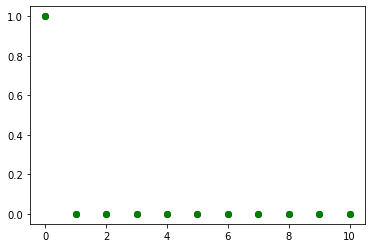

In [72]:
import matplotlib.pyplot as plt
plt.plot(emxi,'ko')
#plt.plot(emxs, 'ro')
#plt.plot(emxr, 'bo')
plt.plot(emxnp, 'go')
plt.show()

In [74]:
e_minusx_simple(0)

1.0

In [79]:
x = np.arange(0,100,1)
plt.plot(x,e_minusx_simple(x))
plt.show()

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

1